In [1]:
#!pip install pandas seaborn scikit-learn lmfit mahotas imread
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Functions.functions import TE_MSD,Michalet,set_size,pool_data
from sklearn.cluster import KMeans
import matplotlib as mpl
import seaborn as sns
import random

%matplotlib inline
%reload_ext autoreload

# Experimental condition
dt = 0.05

# Initial filtering
minframe=10
maxframe=80
rsquared_threshold=-1000

# Small $R_S$

In [2]:
files = ["Data/SM1/tracks135.csv","Data/SM2/tracks135.csv","Data/SM3/tracks135.csv","Data/SM4/tracks135.csv","Data/SM5/tracks135.csv","Data/SM6/tracks135.csv","Data/SM7/tracks135.csv","Data/SM8/tracks135.csv","Data/SM9/tracks135.csv","Data/SM10/tracks135.csv"]
df135 = pool_data(files,dt,minframe,maxframe,rsquared_threshold,fit_option=[2,6])

Parameters for the MSD analysis: dt =  0.05
Initial filters: minframe =  10 , maxframe =  80 , R2 threshold =  -1000
Fit option:  [2, 6]
Reading filenames in  ['Data/SM1/tracks135.csv', 'Data/SM2/tracks135.csv', 'Data/SM3/tracks135.csv', 'Data/SM4/tracks135.csv', 'Data/SM5/tracks135.csv', 'Data/SM6/tracks135.csv', 'Data/SM7/tracks135.csv', 'Data/SM8/tracks135.csv', 'Data/SM9/tracks135.csv', 'Data/SM10/tracks135.csv'] ...
Analysis for Data/SM1/tracks135.csv ...
96  tracks were kept out of  5305 . Done.
Analysis for Data/SM2/tracks135.csv ...
479  tracks were kept out of  31804 . Done.
Analysis for Data/SM3/tracks135.csv ...
276  tracks were kept out of  14417 . Done.
Analysis for Data/SM4/tracks135.csv ...
184  tracks were kept out of  8871 . Done.
Analysis for Data/SM5/tracks135.csv ...
36  tracks were kept out of  2558 . Done.
Analysis for Data/SM6/tracks135.csv ...
209  tracks were kept out of  12231 . Done.
Analysis for Data/SM7/tracks135.csv ...
723  tracks were kept out of  28695 

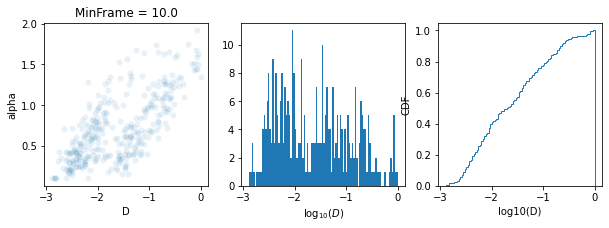

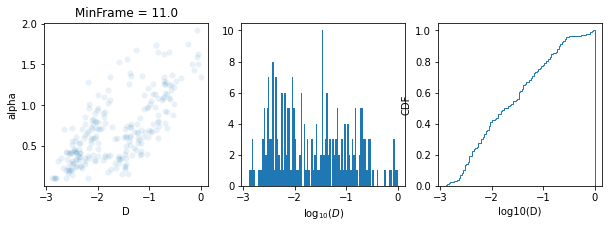

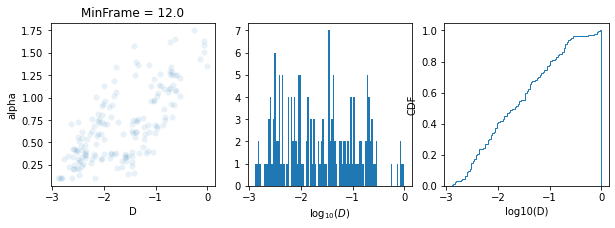

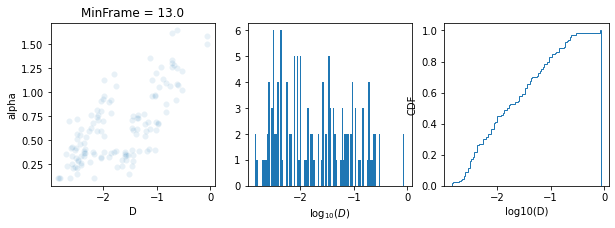

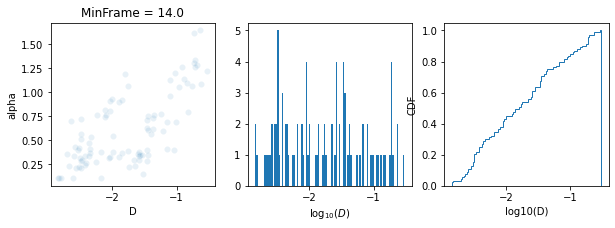

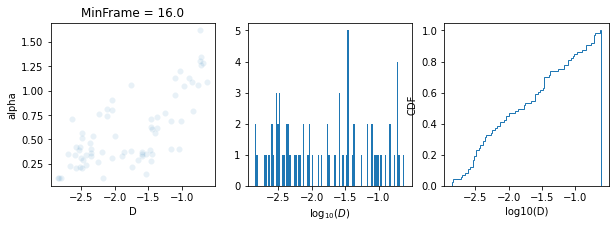

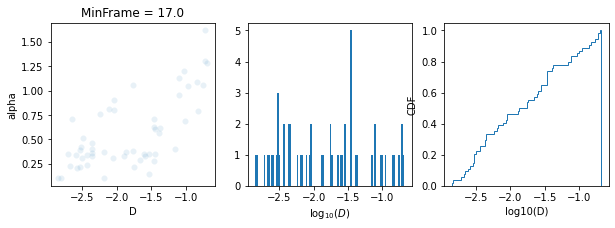

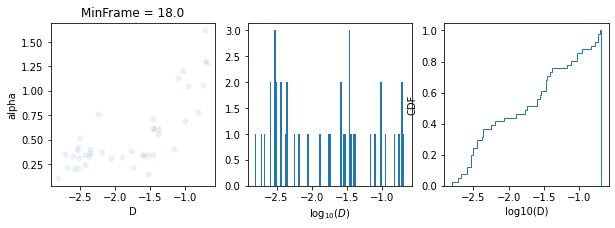

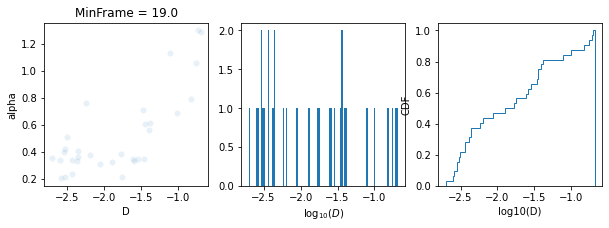

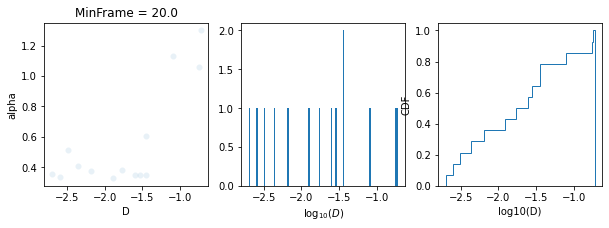

In [3]:
N = np.linspace(minframe,20,10)
for n in N:
    temp1 = df135[(df135['N']>n) & (df135['R2']>0.5)]
    fig, ax = plt.subplots(1,3,figsize=(10,3))
    
    sns.scatterplot(x='D',y='alpha',data=temp1,ax=ax[0],alpha=0.1)
    ax[0].set_title('MinFrame = '+str(round(n)))
    
    ax[1].hist(temp1['D'],bins=100)
    ax[1].set_xlabel(r'log$_{10}(D)$')
    
    ax[2].hist(temp1['D'],bins=100,density=True, histtype='step',cumulative=True)
    ax[2].set_ylabel('CDF')
    ax[2].set_xlabel('log10(D)')

    plt.show()

In [4]:
df135 = df135[(df135['N']>=10) & (df135['R2']>0.5)]

In [5]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import *

temp = df135[['alpha','D','c']].values
scaler = PowerTransformer()
scaler.fit(temp)
temp_scaled = scaler.transform(temp)

gmm = GaussianMixture(n_components=3,max_iter=2000,covariance_type='full',tol=1.0E-10,reg_covar=1.0E-10,init_params='random',n_init=500)
gmm.fit(temp_scaled)
proba_lists = gmm.predict_proba(temp_scaled)

colored_arrays = np.matrix(proba_lists)
colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]
colorlist = [np.argmax(x) for x in colored_tuples]
df135['GM_Label']=colorlist

#Try to determine automatically the index for the confined group
index = [0,1,2]
D_per_group = []
for indx in index:
    Dmean = df135['D'][(df135['GM_Label']==indx)].mean()
    D_per_group.append(Dmean)

index_slow = D_per_group.index(min(D_per_group))
index_transported = D_per_group.index(max(D_per_group))
index_fast = list(filter(lambda x : x != index_slow and x != index_transported, index))[0]

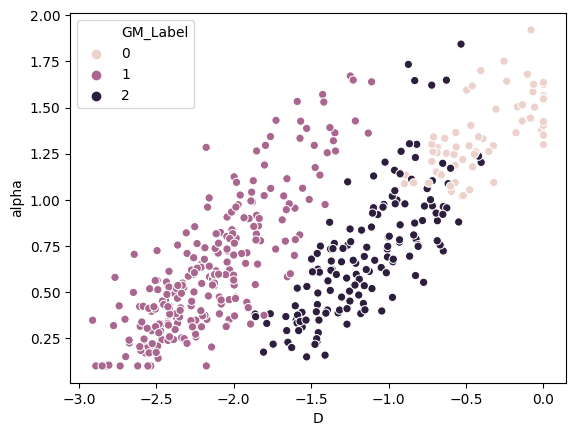

In [6]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.scatterplot(x='D',y='alpha',hue='GM_Label',data=df135)
plt.show()

#############################################
############## PROGRAM MICHALET #############
#############################################
Compute the TE-MSD and ensemble variance...
Number of T-MSDs at time lag  0.05  =  242
Number of T-MSDs at time lag  0.1  =  242
Number of T-MSDs at time lag  0.15  =  242
Number of T-MSDs at time lag  0.2  =  242
Number of T-MSDs at time lag  0.25  =  242
Number of T-MSDs at time lag  0.3  =  242
Number of T-MSDs at time lag  0.35  =  242
Number of T-MSDs at time lag  0.4  =  242
Number of T-MSDs at time lag  0.45  =  242
Number of T-MSDs at time lag  0.5  =  178
Number of T-MSDs at time lag  0.55  =  123
Number of T-MSDs at time lag  0.6  =  87
Number of T-MSDs at time lag  0.65  =  68
Number of T-MSDs at time lag  0.7  =  47
Number of T-MSDs at time lag  0.75  =  36
Number of T-MSDs at time lag  0.8  =  27
Number of T-MSDs at time lag  0.85  =  19
Number of T-MSDs at time lag  0.9  =  16
Number of T-MSDs at time lag  0.95  =  9
Number of T-MSDs at

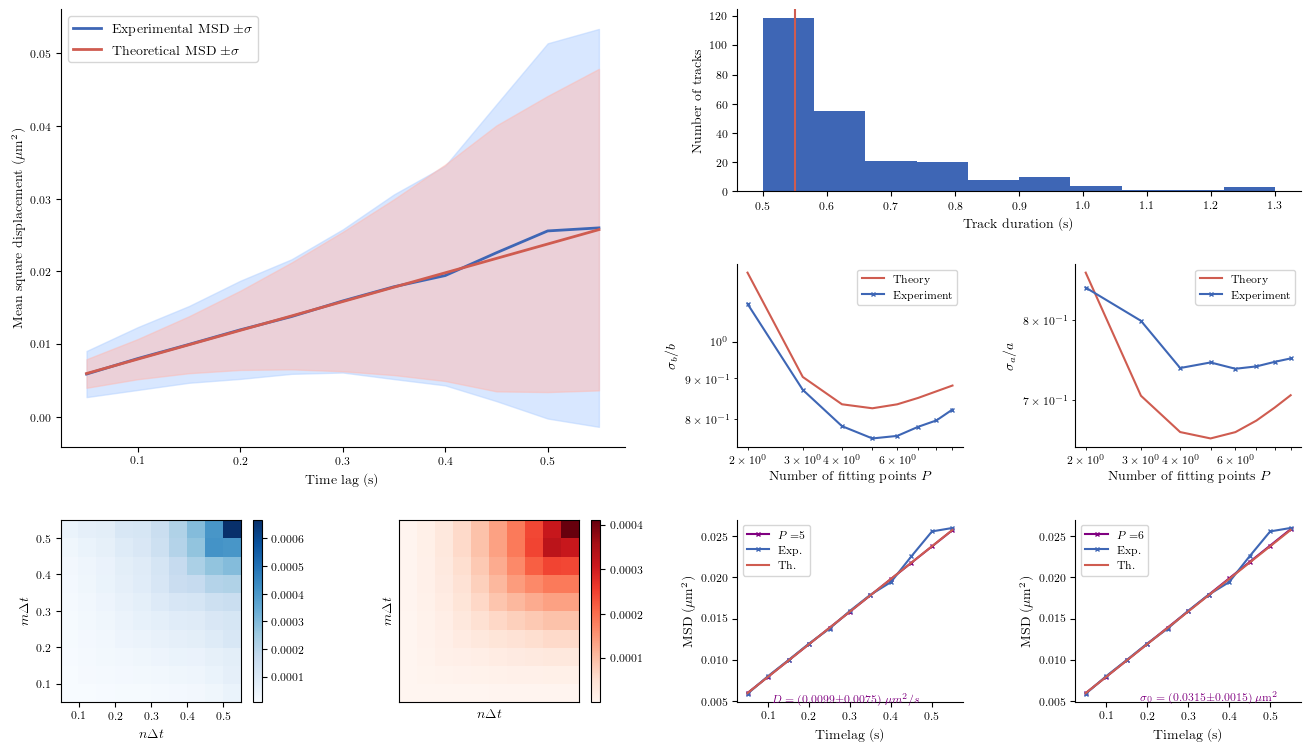

/home/remy13127/Documents/Internship/Functions/functions.py:1013: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


(0.0099, 0.0075, 0.0315, 0.0015)

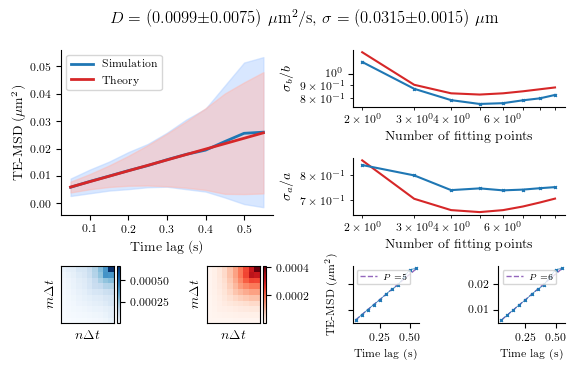

In [296]:
MSDslow = list(df135['MSD'][(df135['GM_Label']==index_slow)].values)
Michalet(MSDslow,cutoff=0.55)

# Identify the tracks in the dataset associated to the larger $R_S$

In [7]:
files = ["Data/SM1/tracks425.csv","Data/SM2/tracks425.csv","Data/SM3/tracks425.csv","Data/SM4/tracks425.csv","Data/SM5/tracks425.csv","Data/SM6/tracks425.csv","Data/SM7/tracks425.csv","Data/SM8/tracks425.csv","Data/SM9/tracks425.csv","Data/SM10/tracks425.csv"]
df425 = pool_data(files,dt,minframe,maxframe,rsquared_threshold,fit_option=[2,6],display_id=True)

Parameters for the MSD analysis: dt =  0.05
Initial filters: minframe =  10 , maxframe =  80 , R2 threshold =  -1000
Fit option:  [2, 6]
Reading filenames in  ['Data/SM1/tracks425.csv', 'Data/SM2/tracks425.csv', 'Data/SM3/tracks425.csv', 'Data/SM4/tracks425.csv', 'Data/SM5/tracks425.csv', 'Data/SM6/tracks425.csv', 'Data/SM7/tracks425.csv', 'Data/SM8/tracks425.csv', 'Data/SM9/tracks425.csv', 'Data/SM10/tracks425.csv'] ...
Analysis for Data/SM1/tracks425.csv ...
Track 0 out of 3552
Track 1 out of 3552
Track 2 out of 3552
Track 3 out of 3552
Track 4 out of 3552
Track 5 out of 3552
Track 6 out of 3552
Track 7 out of 3552
Track 8 out of 3552
Track 9 out of 3552
Track 10 out of 3552
Track 11 out of 3552
Track 12 out of 3552
Track 13 out of 3552
Track 14 out of 3552
Track 15 out of 3552
Track 16 out of 3552
Track 17 out of 3552
Track 18 out of 3552
Track 19 out of 3552
Track 20 out of 3552
Track 21 out of 3552
Track 22 out of 3552
Track 23 out of 3552
Track 24 out of 3552
Track 25 out of 3552

Track 404 out of 3552
Track 405 out of 3552
Track 406 out of 3552
Track 407 out of 3552
Track 408 out of 3552
Track 409 out of 3552
Track 410 out of 3552
Track 411 out of 3552
Track 412 out of 3552
Track 413 out of 3552
Track 414 out of 3552
Track 415 out of 3552
Track 416 out of 3552
Track 417 out of 3552
Track 418 out of 3552
Track 419 out of 3552
Track 420 out of 3552
Track 421 out of 3552
Track 422 out of 3552
Track 423 out of 3552
Track 424 out of 3552
Track 425 out of 3552
Track 426 out of 3552
Track 427 out of 3552
Track 428 out of 3552
Track 429 out of 3552
Track 430 out of 3552
Track 431 out of 3552
Track 432 out of 3552
Track 433 out of 3552
Track 434 out of 3552
Track 435 out of 3552
Track 436 out of 3552
Track 437 out of 3552
Track 438 out of 3552
Track 439 out of 3552
Track 440 out of 3552
Track 441 out of 3552
Track 442 out of 3552
Track 443 out of 3552
Track 444 out of 3552
Track 445 out of 3552
Track 446 out of 3552
Track 447 out of 3552
Track 448 out of 3552
Track 449 

Track 815 out of 3552
Track 816 out of 3552
Track 817 out of 3552
Track 818 out of 3552
Track 819 out of 3552
Track 820 out of 3552
Track 821 out of 3552
Track 822 out of 3552
Track 823 out of 3552
Track 824 out of 3552
Track 825 out of 3552
Track 826 out of 3552
Track 827 out of 3552
Track 828 out of 3552
Track 829 out of 3552
Track 830 out of 3552
Track 831 out of 3552
Track 832 out of 3552
Track 833 out of 3552
Track 834 out of 3552
Track 835 out of 3552
Track 836 out of 3552
Track 837 out of 3552
Track 838 out of 3552
Track 839 out of 3552
Track 840 out of 3552
Track 841 out of 3552
Track 842 out of 3552
Track 843 out of 3552
Track 844 out of 3552
Track 845 out of 3552
Track 846 out of 3552
Track 847 out of 3552
Track 848 out of 3552
Track 849 out of 3552
Track 850 out of 3552
Track 851 out of 3552
Track 852 out of 3552
Track 853 out of 3552
Track 854 out of 3552
Track 855 out of 3552
Track 856 out of 3552
Track 857 out of 3552
Track 858 out of 3552
Track 859 out of 3552
Track 860 

Track 1200 out of 3552
Track 1201 out of 3552
Track 1202 out of 3552
Track 1203 out of 3552
Track 1204 out of 3552
Track 1205 out of 3552
Track 1206 out of 3552
Track 1207 out of 3552
Track 1208 out of 3552
Track 1209 out of 3552
Track 1210 out of 3552
Track 1211 out of 3552
Track 1212 out of 3552
Track 1213 out of 3552
Track 1214 out of 3552
Track 1215 out of 3552
Track 1216 out of 3552
Track 1217 out of 3552
Track 1218 out of 3552
Track 1219 out of 3552
Track 1220 out of 3552
Track 1221 out of 3552
Track 1222 out of 3552
Track 1223 out of 3552
Track 1224 out of 3552
Track 1225 out of 3552
Track 1226 out of 3552
Track 1227 out of 3552
Track 1228 out of 3552
Track 1229 out of 3552
Track 1230 out of 3552
Track 1231 out of 3552
Track 1232 out of 3552
Track 1233 out of 3552
Track 1234 out of 3552
Track 1235 out of 3552
Track 1236 out of 3552
Track 1237 out of 3552
Track 1238 out of 3552
Track 1239 out of 3552
Track 1240 out of 3552
Track 1241 out of 3552
Track 1242 out of 3552
Track 1243 

Track 1611 out of 3552
Track 1612 out of 3552
Track 1613 out of 3552
Track 1614 out of 3552
Track 1615 out of 3552
Track 1616 out of 3552
Track 1617 out of 3552
Track 1618 out of 3552
Track 1619 out of 3552
Track 1620 out of 3552
Track 1621 out of 3552
Track 1622 out of 3552
Track 1623 out of 3552
Track 1624 out of 3552
Track 1625 out of 3552
Track 1626 out of 3552
Track 1627 out of 3552
Track 1628 out of 3552
Track 1629 out of 3552
Track 1630 out of 3552
Track 1631 out of 3552
Track 1632 out of 3552
Track 1633 out of 3552
Track 1634 out of 3552
Track 1635 out of 3552
Track 1636 out of 3552
Track 1637 out of 3552
Track 1638 out of 3552
Track 1639 out of 3552
Track 1640 out of 3552
Track 1641 out of 3552
Track 1642 out of 3552
Track 1643 out of 3552
Track 1644 out of 3552
Track 1645 out of 3552
Track 1646 out of 3552
Track 1647 out of 3552
Track 1648 out of 3552
Track 1649 out of 3552
Track 1650 out of 3552
Track 1651 out of 3552
Track 1652 out of 3552
Track 1653 out of 3552
Track 1654 

Track 2029 out of 3552
Track 2030 out of 3552
Track 2031 out of 3552
Track 2032 out of 3552
Track 2033 out of 3552
Track 2034 out of 3552
Track 2035 out of 3552
Track 2036 out of 3552
Track 2037 out of 3552
Track 2038 out of 3552
Track 2039 out of 3552
Track 2040 out of 3552
Track 2041 out of 3552
Track 2042 out of 3552
Track 2043 out of 3552
Track 2044 out of 3552
Track 2045 out of 3552
Track 2046 out of 3552
Track 2047 out of 3552
Track 2048 out of 3552
Track 2049 out of 3552
Track 2050 out of 3552
Track 2051 out of 3552
Track 2052 out of 3552
Track 2053 out of 3552
Track 2054 out of 3552
Track 2055 out of 3552
Track 2056 out of 3552
Track 2057 out of 3552
Track 2058 out of 3552
Track 2059 out of 3552
Track 2060 out of 3552
Track 2061 out of 3552
Track 2062 out of 3552
Track 2063 out of 3552
Track 2064 out of 3552
Track 2065 out of 3552
Track 2066 out of 3552
Track 2067 out of 3552
Track 2068 out of 3552
Track 2069 out of 3552
Track 2070 out of 3552
Track 2071 out of 3552
Track 2072 

Track 2395 out of 3552
Track 2396 out of 3552
Track 2397 out of 3552
Track 2398 out of 3552
Track 2399 out of 3552
Track 2400 out of 3552
Track 2401 out of 3552
Track 2402 out of 3552
Track 2403 out of 3552
Track 2404 out of 3552
Track 2405 out of 3552
Track 2406 out of 3552
Track 2407 out of 3552
Track 2408 out of 3552
Track 2409 out of 3552
Track 2410 out of 3552
Track 2411 out of 3552
Track 2412 out of 3552
Track 2413 out of 3552
Track 2414 out of 3552
Track 2415 out of 3552
Track 2416 out of 3552
Track 2417 out of 3552
Track 2418 out of 3552
Track 2419 out of 3552
Track 2420 out of 3552
Track 2421 out of 3552
Track 2422 out of 3552
Track 2423 out of 3552
Track 2424 out of 3552
Track 2425 out of 3552
Track 2426 out of 3552
Track 2427 out of 3552
Track 2428 out of 3552
Track 2429 out of 3552
Track 2430 out of 3552
Track 2431 out of 3552
Track 2432 out of 3552
Track 2433 out of 3552
Track 2434 out of 3552
Track 2435 out of 3552
Track 2436 out of 3552
Track 2437 out of 3552
Track 2438 

Track 2806 out of 3552
Track 2807 out of 3552
Track 2808 out of 3552
Track 2809 out of 3552
Track 2810 out of 3552
Track 2811 out of 3552
Track 2812 out of 3552
Track 2813 out of 3552
Track 2814 out of 3552
Track 2815 out of 3552
Track 2816 out of 3552
Track 2817 out of 3552
Track 2818 out of 3552
Track 2819 out of 3552
Track 2820 out of 3552
Track 2821 out of 3552
Track 2822 out of 3552
Track 2823 out of 3552
Track 2824 out of 3552
Track 2825 out of 3552
Track 2826 out of 3552
Track 2827 out of 3552
Track 2828 out of 3552
Track 2829 out of 3552
Track 2830 out of 3552
Track 2831 out of 3552
Track 2832 out of 3552
Track 2833 out of 3552
Track 2834 out of 3552
Track 2835 out of 3552
Track 2836 out of 3552
Track 2837 out of 3552
Track 2838 out of 3552
Track 2839 out of 3552
Track 2840 out of 3552
Track 2841 out of 3552
Track 2842 out of 3552
Track 2843 out of 3552
Track 2844 out of 3552
Track 2845 out of 3552
Track 2846 out of 3552
Track 2847 out of 3552
Track 2848 out of 3552
Track 2849 

Track 3186 out of 3552
Track 3187 out of 3552
Track 3188 out of 3552
Track 3189 out of 3552
Track 3190 out of 3552
Track 3191 out of 3552
Track 3192 out of 3552
Track 3193 out of 3552
Track 3194 out of 3552
Track 3195 out of 3552
Track 3196 out of 3552
Track 3197 out of 3552
Track 3198 out of 3552
Track 3199 out of 3552
Track 3200 out of 3552
Track 3201 out of 3552
Track 3202 out of 3552
Track 3203 out of 3552
Track 3204 out of 3552
Track 3205 out of 3552
Track 3206 out of 3552
Track 3207 out of 3552
Track 3208 out of 3552
Track 3209 out of 3552
Track 3210 out of 3552
Track 3211 out of 3552
Track 3212 out of 3552
Track 3213 out of 3552
Track 3214 out of 3552
Track 3215 out of 3552
Track 3216 out of 3552
Track 3217 out of 3552
Track 3218 out of 3552
Track 3219 out of 3552
Track 3220 out of 3552
Track 3221 out of 3552
Track 3222 out of 3552
Track 3223 out of 3552
Track 3224 out of 3552
Track 3225 out of 3552
Track 3226 out of 3552
Track 3227 out of 3552
Track 3228 out of 3552
Track 3229 

Track 0 out of 9665
Track 1 out of 9665
Track 2 out of 9665
Track 3 out of 9665
Track 4 out of 9665
Track 5 out of 9665
Track 6 out of 9665
Track 7 out of 9665
Track 8 out of 9665
Track 9 out of 9665
Track 10 out of 9665
Track 11 out of 9665
Track 12 out of 9665
Track 13 out of 9665
Track 14 out of 9665
Track 15 out of 9665
Track 16 out of 9665
Track 17 out of 9665
Track 18 out of 9665
Track 19 out of 9665
Track 20 out of 9665
Track 21 out of 9665
Track 22 out of 9665
Track 23 out of 9665
Track 24 out of 9665
Track 25 out of 9665
Track 26 out of 9665
Track 27 out of 9665
Track 28 out of 9665
Track 29 out of 9665
Track 30 out of 9665
Track 31 out of 9665
Track 32 out of 9665
Track 33 out of 9665
Track 34 out of 9665
Track 35 out of 9665
Track 36 out of 9665
Track 37 out of 9665
Track 38 out of 9665
Track 39 out of 9665
Track 40 out of 9665
Track 41 out of 9665
Track 42 out of 9665
Track 43 out of 9665
Track 44 out of 9665
Track 45 out of 9665
Track 46 out of 9665
Track 47 out of 9665
Tr

Track 395 out of 9665
Track 396 out of 9665
Track 397 out of 9665
Track 398 out of 9665
Track 399 out of 9665
Track 400 out of 9665
Track 401 out of 9665
Track 402 out of 9665
Track 403 out of 9665
Track 404 out of 9665
Track 405 out of 9665
Track 406 out of 9665
Track 407 out of 9665
Track 408 out of 9665
Track 409 out of 9665
Track 410 out of 9665
Track 411 out of 9665
Track 412 out of 9665
Track 413 out of 9665
Track 414 out of 9665
Track 415 out of 9665
Track 416 out of 9665
Track 417 out of 9665
Track 418 out of 9665
Track 419 out of 9665
Track 420 out of 9665
Track 421 out of 9665
Track 422 out of 9665
Track 423 out of 9665
Track 424 out of 9665
Track 425 out of 9665
Track 426 out of 9665
Track 427 out of 9665
Track 428 out of 9665
Track 429 out of 9665
Track 430 out of 9665
Track 431 out of 9665
Track 432 out of 9665
Track 433 out of 9665
Track 434 out of 9665
Track 435 out of 9665
Track 436 out of 9665
Track 437 out of 9665
Track 438 out of 9665
Track 439 out of 9665
Track 440 

Track 818 out of 9665
Track 819 out of 9665
Track 820 out of 9665
Track 821 out of 9665
Track 822 out of 9665
Track 823 out of 9665
Track 824 out of 9665
Track 825 out of 9665
Track 826 out of 9665
Track 827 out of 9665
Track 828 out of 9665
Track 829 out of 9665
Track 830 out of 9665
Track 831 out of 9665
Track 832 out of 9665
Track 833 out of 9665
Track 834 out of 9665
Track 835 out of 9665
Track 836 out of 9665
Track 837 out of 9665
Track 838 out of 9665
Track 839 out of 9665
Track 840 out of 9665
Track 841 out of 9665
Track 842 out of 9665
Track 843 out of 9665
Track 844 out of 9665
Track 845 out of 9665
Track 846 out of 9665
Track 847 out of 9665
Track 848 out of 9665
Track 849 out of 9665
Track 850 out of 9665
Track 851 out of 9665
Track 852 out of 9665
Track 853 out of 9665
Track 854 out of 9665
Track 855 out of 9665
Track 856 out of 9665
Track 857 out of 9665
Track 858 out of 9665
Track 859 out of 9665
Track 860 out of 9665
Track 861 out of 9665
Track 862 out of 9665
Track 863 

Track 1266 out of 9665
Track 1267 out of 9665
Track 1268 out of 9665
Track 1269 out of 9665
Track 1270 out of 9665
Track 1271 out of 9665
Track 1272 out of 9665
Track 1273 out of 9665
Track 1274 out of 9665
Track 1275 out of 9665
Track 1276 out of 9665
Track 1277 out of 9665
Track 1278 out of 9665
Track 1279 out of 9665
Track 1280 out of 9665
Track 1281 out of 9665
Track 1282 out of 9665
Track 1283 out of 9665
Track 1284 out of 9665
Track 1285 out of 9665
Track 1286 out of 9665
Track 1287 out of 9665
Track 1288 out of 9665
Track 1289 out of 9665
Track 1290 out of 9665
Track 1291 out of 9665
Track 1292 out of 9665
Track 1293 out of 9665
Track 1294 out of 9665
Track 1295 out of 9665
Track 1296 out of 9665
Track 1297 out of 9665
Track 1298 out of 9665
Track 1299 out of 9665
Track 1300 out of 9665
Track 1301 out of 9665
Track 1302 out of 9665
Track 1303 out of 9665
Track 1304 out of 9665
Track 1305 out of 9665
Track 1306 out of 9665
Track 1307 out of 9665
Track 1308 out of 9665
Track 1309 

Track 1708 out of 9665
Track 1709 out of 9665
Track 1710 out of 9665
Track 1711 out of 9665
Track 1712 out of 9665
Track 1713 out of 9665
Track 1714 out of 9665
Track 1715 out of 9665
Track 1716 out of 9665
Track 1717 out of 9665
Track 1718 out of 9665
Track 1719 out of 9665
Track 1720 out of 9665
Track 1721 out of 9665
Track 1722 out of 9665
Track 1723 out of 9665
Track 1724 out of 9665
Track 1725 out of 9665
Track 1726 out of 9665
Track 1727 out of 9665
Track 1728 out of 9665
Track 1729 out of 9665
Track 1730 out of 9665
Track 1731 out of 9665
Track 1732 out of 9665
Track 1733 out of 9665
Track 1734 out of 9665
Track 1735 out of 9665
Track 1736 out of 9665
Track 1737 out of 9665
Track 1738 out of 9665
Track 1739 out of 9665
Track 1740 out of 9665
Track 1741 out of 9665
Track 1742 out of 9665
Track 1743 out of 9665
Track 1744 out of 9665
Track 1745 out of 9665
Track 1746 out of 9665
Track 1747 out of 9665
Track 1748 out of 9665
Track 1749 out of 9665
Track 1750 out of 9665
Track 1751 

Track 2165 out of 9665
Track 2166 out of 9665
Track 2167 out of 9665
Track 2168 out of 9665
Track 2169 out of 9665
Track 2170 out of 9665
Track 2171 out of 9665
Track 2172 out of 9665
Track 2173 out of 9665
Track 2174 out of 9665
Track 2175 out of 9665
Track 2176 out of 9665
Track 2177 out of 9665
Track 2178 out of 9665
Track 2179 out of 9665
Track 2180 out of 9665
Track 2181 out of 9665
Track 2182 out of 9665
Track 2183 out of 9665
Track 2184 out of 9665
Track 2185 out of 9665
Track 2186 out of 9665
Track 2187 out of 9665
Track 2188 out of 9665
Track 2189 out of 9665
Track 2190 out of 9665
Track 2191 out of 9665
Track 2192 out of 9665
Track 2193 out of 9665
Track 2194 out of 9665
Track 2195 out of 9665
Track 2196 out of 9665
Track 2197 out of 9665
Track 2198 out of 9665
Track 2199 out of 9665
Track 2200 out of 9665
Track 2201 out of 9665
Track 2202 out of 9665
Track 2203 out of 9665
Track 2204 out of 9665
Track 2205 out of 9665
Track 2206 out of 9665
Track 2207 out of 9665
Track 2208 

Track 2569 out of 9665
Track 2570 out of 9665
Track 2571 out of 9665
Track 2572 out of 9665
Track 2573 out of 9665
Track 2574 out of 9665
Track 2575 out of 9665
Track 2576 out of 9665
Track 2577 out of 9665
Track 2578 out of 9665
Track 2579 out of 9665
Track 2580 out of 9665
Track 2581 out of 9665
Track 2582 out of 9665
Track 2583 out of 9665
Track 2584 out of 9665
Track 2585 out of 9665
Track 2586 out of 9665
Track 2587 out of 9665
Track 2588 out of 9665
Track 2589 out of 9665
Track 2590 out of 9665
Track 2591 out of 9665
Track 2592 out of 9665
Track 2593 out of 9665
Track 2594 out of 9665
Track 2595 out of 9665
Track 2596 out of 9665
Track 2597 out of 9665
Track 2598 out of 9665
Track 2599 out of 9665
Track 2600 out of 9665
Track 2601 out of 9665
Track 2602 out of 9665
Track 2603 out of 9665
Track 2604 out of 9665
Track 2605 out of 9665
Track 2606 out of 9665
Track 2607 out of 9665
Track 2608 out of 9665
Track 2609 out of 9665
Track 2610 out of 9665
Track 2611 out of 9665
Track 2612 

Track 2955 out of 9665
Track 2956 out of 9665
Track 2957 out of 9665
Track 2958 out of 9665
Track 2959 out of 9665
Track 2960 out of 9665
Track 2961 out of 9665
Track 2962 out of 9665
Track 2963 out of 9665
Track 2964 out of 9665
Track 2965 out of 9665
Track 2966 out of 9665
Track 2967 out of 9665
Track 2968 out of 9665
Track 2969 out of 9665
Track 2970 out of 9665
Track 2971 out of 9665
Track 2972 out of 9665
Track 2973 out of 9665
Track 2974 out of 9665
Track 2975 out of 9665
Track 2976 out of 9665
Track 2977 out of 9665
Track 2978 out of 9665
Track 2979 out of 9665
Track 2980 out of 9665
Track 2981 out of 9665
Track 2982 out of 9665
Track 2983 out of 9665
Track 2984 out of 9665
Track 2985 out of 9665
Track 2986 out of 9665
Track 2987 out of 9665
Track 2988 out of 9665
Track 2989 out of 9665
Track 2990 out of 9665
Track 2991 out of 9665
Track 2992 out of 9665
Track 2993 out of 9665
Track 2994 out of 9665
Track 2995 out of 9665
Track 2996 out of 9665
Track 2997 out of 9665
Track 2998 

Track 3365 out of 9665
Track 3366 out of 9665
Track 3367 out of 9665
Track 3368 out of 9665
Track 3369 out of 9665
Track 3370 out of 9665
Track 3371 out of 9665
Track 3372 out of 9665
Track 3373 out of 9665
Track 3374 out of 9665
Track 3375 out of 9665
Track 3376 out of 9665
Track 3377 out of 9665
Track 3378 out of 9665
Track 3379 out of 9665
Track 3380 out of 9665
Track 3381 out of 9665
Track 3382 out of 9665
Track 3383 out of 9665
Track 3384 out of 9665
Track 3385 out of 9665
Track 3386 out of 9665
Track 3387 out of 9665
Track 3388 out of 9665
Track 3389 out of 9665
Track 3390 out of 9665
Track 3391 out of 9665
Track 3392 out of 9665
Track 3393 out of 9665
Track 3394 out of 9665
Track 3395 out of 9665
Track 3396 out of 9665
Track 3397 out of 9665
Track 3398 out of 9665
Track 3399 out of 9665
Track 3400 out of 9665
Track 3401 out of 9665
Track 3402 out of 9665
Track 3403 out of 9665
Track 3404 out of 9665
Track 3405 out of 9665
Track 3406 out of 9665
Track 3407 out of 9665
Track 3408 

Track 3745 out of 9665
Track 3746 out of 9665
Track 3747 out of 9665
Track 3748 out of 9665
Track 3749 out of 9665
Track 3750 out of 9665
Track 3751 out of 9665
Track 3752 out of 9665
Track 3753 out of 9665
Track 3754 out of 9665
Track 3755 out of 9665
Track 3756 out of 9665
Track 3757 out of 9665
Track 3758 out of 9665
Track 3759 out of 9665
Track 3760 out of 9665
Track 3761 out of 9665
Track 3762 out of 9665
Track 3763 out of 9665
Track 3764 out of 9665
Track 3765 out of 9665
Track 3766 out of 9665
Track 3767 out of 9665
Track 3768 out of 9665
Track 3769 out of 9665
Track 3770 out of 9665
Track 3771 out of 9665
Track 3772 out of 9665
Track 3773 out of 9665
Track 3774 out of 9665
Track 3775 out of 9665
Track 3776 out of 9665
Track 3777 out of 9665
Track 3778 out of 9665
Track 3779 out of 9665
Track 3780 out of 9665
Track 3781 out of 9665
Track 3782 out of 9665
Track 3783 out of 9665
Track 3784 out of 9665
Track 3785 out of 9665
Track 3786 out of 9665
Track 3787 out of 9665
Track 3788 

Track 4138 out of 9665
Track 4139 out of 9665
Track 4140 out of 9665
Track 4141 out of 9665
Track 4142 out of 9665
Track 4143 out of 9665
Track 4144 out of 9665
Track 4145 out of 9665
Track 4146 out of 9665
Track 4147 out of 9665
Track 4148 out of 9665
Track 4149 out of 9665
Track 4150 out of 9665
Track 4151 out of 9665
Track 4152 out of 9665
Track 4153 out of 9665
Track 4154 out of 9665
Track 4155 out of 9665
Track 4156 out of 9665
Track 4157 out of 9665
Track 4158 out of 9665
Track 4159 out of 9665
Track 4160 out of 9665
Track 4161 out of 9665
Track 4162 out of 9665
Track 4163 out of 9665
Track 4164 out of 9665
Track 4165 out of 9665
Track 4166 out of 9665
Track 4167 out of 9665
Track 4168 out of 9665
Track 4169 out of 9665
Track 4170 out of 9665
Track 4171 out of 9665
Track 4172 out of 9665
Track 4173 out of 9665
Track 4174 out of 9665
Track 4175 out of 9665
Track 4176 out of 9665
Track 4177 out of 9665
Track 4178 out of 9665
Track 4179 out of 9665
Track 4180 out of 9665
Track 4181 

Track 4495 out of 9665
Track 4496 out of 9665
Track 4497 out of 9665
Track 4498 out of 9665
Track 4499 out of 9665
Track 4500 out of 9665
Track 4501 out of 9665
Track 4502 out of 9665
Track 4503 out of 9665
Track 4504 out of 9665
Track 4505 out of 9665
Track 4506 out of 9665
Track 4507 out of 9665
Track 4508 out of 9665
Track 4509 out of 9665
Track 4510 out of 9665
Track 4511 out of 9665
Track 4512 out of 9665
Track 4513 out of 9665
Track 4514 out of 9665
Track 4515 out of 9665
Track 4516 out of 9665
Track 4517 out of 9665
Track 4518 out of 9665
Track 4519 out of 9665
Track 4520 out of 9665
Track 4521 out of 9665
Track 4522 out of 9665
Track 4523 out of 9665
Track 4524 out of 9665
Track 4525 out of 9665
Track 4526 out of 9665
Track 4527 out of 9665
Track 4528 out of 9665
Track 4529 out of 9665
Track 4530 out of 9665
Track 4531 out of 9665
Track 4532 out of 9665
Track 4533 out of 9665
Track 4534 out of 9665
Track 4535 out of 9665
Track 4536 out of 9665
Track 4537 out of 9665
Track 4538 

Track 4940 out of 9665
Track 4941 out of 9665
Track 4942 out of 9665
Track 4943 out of 9665
Track 4944 out of 9665
Track 4945 out of 9665
Track 4946 out of 9665
Track 4947 out of 9665
Track 4948 out of 9665
Track 4949 out of 9665
Track 4950 out of 9665
Track 4951 out of 9665
Track 4952 out of 9665
Track 4953 out of 9665
Track 4954 out of 9665
Track 4955 out of 9665
Track 4956 out of 9665
Track 4957 out of 9665
Track 4958 out of 9665
Track 4959 out of 9665
Track 4960 out of 9665
Track 4961 out of 9665
Track 4962 out of 9665
Track 4963 out of 9665
Track 4964 out of 9665
Track 4965 out of 9665
Track 4966 out of 9665
Track 4967 out of 9665
Track 4968 out of 9665
Track 4969 out of 9665
Track 4970 out of 9665
Track 4971 out of 9665
Track 4972 out of 9665
Track 4973 out of 9665
Track 4974 out of 9665
Track 4975 out of 9665
Track 4976 out of 9665
Track 4977 out of 9665
Track 4978 out of 9665
Track 4979 out of 9665
Track 4980 out of 9665
Track 4981 out of 9665
Track 4982 out of 9665
Track 4983 

Track 5317 out of 9665
Track 5318 out of 9665
Track 5319 out of 9665
Track 5320 out of 9665
Track 5321 out of 9665
Track 5322 out of 9665
Track 5323 out of 9665
Track 5324 out of 9665
Track 5325 out of 9665
Track 5326 out of 9665
Track 5327 out of 9665
Track 5328 out of 9665
Track 5329 out of 9665
Track 5330 out of 9665
Track 5331 out of 9665
Track 5332 out of 9665
Track 5333 out of 9665
Track 5334 out of 9665
Track 5335 out of 9665
Track 5336 out of 9665
Track 5337 out of 9665
Track 5338 out of 9665
Track 5339 out of 9665
Track 5340 out of 9665
Track 5341 out of 9665
Track 5342 out of 9665
Track 5343 out of 9665
Track 5344 out of 9665
Track 5345 out of 9665
Track 5346 out of 9665
Track 5347 out of 9665
Track 5348 out of 9665
Track 5349 out of 9665
Track 5350 out of 9665
Track 5351 out of 9665
Track 5352 out of 9665
Track 5353 out of 9665
Track 5354 out of 9665
Track 5355 out of 9665
Track 5356 out of 9665
Track 5357 out of 9665
Track 5358 out of 9665
Track 5359 out of 9665
Track 5360 

Track 5718 out of 9665
Track 5719 out of 9665
Track 5720 out of 9665
Track 5721 out of 9665
Track 5722 out of 9665
Track 5723 out of 9665
Track 5724 out of 9665
Track 5725 out of 9665
Track 5726 out of 9665
Track 5727 out of 9665
Track 5728 out of 9665
Track 5729 out of 9665
Track 5730 out of 9665
Track 5731 out of 9665
Track 5732 out of 9665
Track 5733 out of 9665
Track 5734 out of 9665
Track 5735 out of 9665
Track 5736 out of 9665
Track 5737 out of 9665
Track 5738 out of 9665
Track 5739 out of 9665
Track 5740 out of 9665
Track 5741 out of 9665
Track 5742 out of 9665
Track 5743 out of 9665
Track 5744 out of 9665
Track 5745 out of 9665
Track 5746 out of 9665
Track 5747 out of 9665
Track 5748 out of 9665
Track 5749 out of 9665
Track 5750 out of 9665
Track 5751 out of 9665
Track 5752 out of 9665
Track 5753 out of 9665
Track 5754 out of 9665
Track 5755 out of 9665
Track 5756 out of 9665
Track 5757 out of 9665
Track 5758 out of 9665
Track 5759 out of 9665
Track 5760 out of 9665
Track 5761 

Track 6156 out of 9665
Track 6157 out of 9665
Track 6158 out of 9665
Track 6159 out of 9665
Track 6160 out of 9665
Track 6161 out of 9665
Track 6162 out of 9665
Track 6163 out of 9665
Track 6164 out of 9665
Track 6165 out of 9665
Track 6166 out of 9665
Track 6167 out of 9665
Track 6168 out of 9665
Track 6169 out of 9665
Track 6170 out of 9665
Track 6171 out of 9665
Track 6172 out of 9665
Track 6173 out of 9665
Track 6174 out of 9665
Track 6175 out of 9665
Track 6176 out of 9665
Track 6177 out of 9665
Track 6178 out of 9665
Track 6179 out of 9665
Track 6180 out of 9665
Track 6181 out of 9665
Track 6182 out of 9665
Track 6183 out of 9665
Track 6184 out of 9665
Track 6185 out of 9665
Track 6186 out of 9665
Track 6187 out of 9665
Track 6188 out of 9665
Track 6189 out of 9665
Track 6190 out of 9665
Track 6191 out of 9665
Track 6192 out of 9665
Track 6193 out of 9665
Track 6194 out of 9665
Track 6195 out of 9665
Track 6196 out of 9665
Track 6197 out of 9665
Track 6198 out of 9665
Track 6199 

Track 6554 out of 9665
Track 6555 out of 9665
Track 6556 out of 9665
Track 6557 out of 9665
Track 6558 out of 9665
Track 6559 out of 9665
Track 6560 out of 9665
Track 6561 out of 9665
Track 6562 out of 9665
Track 6563 out of 9665
Track 6564 out of 9665
Track 6565 out of 9665
Track 6566 out of 9665
Track 6567 out of 9665
Track 6568 out of 9665
Track 6569 out of 9665
Track 6570 out of 9665
Track 6571 out of 9665
Track 6572 out of 9665
Track 6573 out of 9665
Track 6574 out of 9665
Track 6575 out of 9665
Track 6576 out of 9665
Track 6577 out of 9665
Track 6578 out of 9665
Track 6579 out of 9665
Track 6580 out of 9665
Track 6581 out of 9665
Track 6582 out of 9665
Track 6583 out of 9665
Track 6584 out of 9665
Track 6585 out of 9665
Track 6586 out of 9665
Track 6587 out of 9665
Track 6588 out of 9665
Track 6589 out of 9665
Track 6590 out of 9665
Track 6591 out of 9665
Track 6592 out of 9665
Track 6593 out of 9665
Track 6594 out of 9665
Track 6595 out of 9665
Track 6596 out of 9665
Track 6597 

Track 6927 out of 9665
Track 6928 out of 9665
Track 6929 out of 9665
Track 6930 out of 9665
Track 6931 out of 9665
Track 6932 out of 9665
Track 6933 out of 9665
Track 6934 out of 9665
Track 6935 out of 9665
Track 6936 out of 9665
Track 6937 out of 9665
Track 6938 out of 9665
Track 6939 out of 9665
Track 6940 out of 9665
Track 6941 out of 9665
Track 6942 out of 9665
Track 6943 out of 9665
Track 6944 out of 9665
Track 6945 out of 9665
Track 6946 out of 9665
Track 6947 out of 9665
Track 6948 out of 9665
Track 6949 out of 9665
Track 6950 out of 9665
Track 6951 out of 9665
Track 6952 out of 9665
Track 6953 out of 9665
Track 6954 out of 9665
Track 6955 out of 9665
Track 6956 out of 9665
Track 6957 out of 9665
Track 6958 out of 9665
Track 6959 out of 9665
Track 6960 out of 9665
Track 6961 out of 9665
Track 6962 out of 9665
Track 6963 out of 9665
Track 6964 out of 9665
Track 6965 out of 9665
Track 6966 out of 9665
Track 6967 out of 9665
Track 6968 out of 9665
Track 6969 out of 9665
Track 6970 

Track 7314 out of 9665
Track 7315 out of 9665
Track 7316 out of 9665
Track 7317 out of 9665
Track 7318 out of 9665
Track 7319 out of 9665
Track 7320 out of 9665
Track 7321 out of 9665
Track 7322 out of 9665
Track 7323 out of 9665
Track 7324 out of 9665
Track 7325 out of 9665
Track 7326 out of 9665
Track 7327 out of 9665
Track 7328 out of 9665
Track 7329 out of 9665
Track 7330 out of 9665
Track 7331 out of 9665
Track 7332 out of 9665
Track 7333 out of 9665
Track 7334 out of 9665
Track 7335 out of 9665
Track 7336 out of 9665
Track 7337 out of 9665
Track 7338 out of 9665
Track 7339 out of 9665
Track 7340 out of 9665
Track 7341 out of 9665
Track 7342 out of 9665
Track 7343 out of 9665
Track 7344 out of 9665
Track 7345 out of 9665
Track 7346 out of 9665
Track 7347 out of 9665
Track 7348 out of 9665
Track 7349 out of 9665
Track 7350 out of 9665
Track 7351 out of 9665
Track 7352 out of 9665
Track 7353 out of 9665
Track 7354 out of 9665
Track 7355 out of 9665
Track 7356 out of 9665
Track 7357 

Track 7695 out of 9665
Track 7696 out of 9665
Track 7697 out of 9665
Track 7698 out of 9665
Track 7699 out of 9665
Track 7700 out of 9665
Track 7701 out of 9665
Track 7702 out of 9665
Track 7703 out of 9665
Track 7704 out of 9665
Track 7705 out of 9665
Track 7706 out of 9665
Track 7707 out of 9665
Track 7708 out of 9665
Track 7709 out of 9665
Track 7710 out of 9665
Track 7711 out of 9665
Track 7712 out of 9665
Track 7713 out of 9665
Track 7714 out of 9665
Track 7715 out of 9665
Track 7716 out of 9665
Track 7717 out of 9665
Track 7718 out of 9665
Track 7719 out of 9665
Track 7720 out of 9665
Track 7721 out of 9665
Track 7722 out of 9665
Track 7723 out of 9665
Track 7724 out of 9665
Track 7725 out of 9665
Track 7726 out of 9665
Track 7727 out of 9665
Track 7728 out of 9665
Track 7729 out of 9665
Track 7730 out of 9665
Track 7731 out of 9665
Track 7732 out of 9665
Track 7733 out of 9665
Track 7734 out of 9665
Track 7735 out of 9665
Track 7736 out of 9665
Track 7737 out of 9665
Track 7738 

Track 8130 out of 9665
Track 8131 out of 9665
Track 8132 out of 9665
Track 8133 out of 9665
Track 8134 out of 9665
Track 8135 out of 9665
Track 8136 out of 9665
Track 8137 out of 9665
Track 8138 out of 9665
Track 8139 out of 9665
Track 8140 out of 9665
Track 8141 out of 9665
Track 8142 out of 9665
Track 8143 out of 9665
Track 8144 out of 9665
Track 8145 out of 9665
Track 8146 out of 9665
Track 8147 out of 9665
Track 8148 out of 9665
Track 8149 out of 9665
Track 8150 out of 9665
Track 8151 out of 9665
Track 8152 out of 9665
Track 8153 out of 9665
Track 8154 out of 9665
Track 8155 out of 9665
Track 8156 out of 9665
Track 8157 out of 9665
Track 8158 out of 9665
Track 8159 out of 9665
Track 8160 out of 9665
Track 8161 out of 9665
Track 8162 out of 9665
Track 8163 out of 9665
Track 8164 out of 9665
Track 8165 out of 9665
Track 8166 out of 9665
Track 8167 out of 9665
Track 8168 out of 9665
Track 8169 out of 9665
Track 8170 out of 9665
Track 8171 out of 9665
Track 8172 out of 9665
Track 8173 

Track 8535 out of 9665
Track 8536 out of 9665
Track 8537 out of 9665
Track 8538 out of 9665
Track 8539 out of 9665
Track 8540 out of 9665
Track 8541 out of 9665
Track 8542 out of 9665
Track 8543 out of 9665
Track 8544 out of 9665
Track 8545 out of 9665
Track 8546 out of 9665
Track 8547 out of 9665
Track 8548 out of 9665
Track 8549 out of 9665
Track 8550 out of 9665
Track 8551 out of 9665
Track 8552 out of 9665
Track 8553 out of 9665
Track 8554 out of 9665
Track 8555 out of 9665
Track 8556 out of 9665
Track 8557 out of 9665
Track 8558 out of 9665
Track 8559 out of 9665
Track 8560 out of 9665
Track 8561 out of 9665
Track 8562 out of 9665
Track 8563 out of 9665
Track 8564 out of 9665
Track 8565 out of 9665
Track 8566 out of 9665
Track 8567 out of 9665
Track 8568 out of 9665
Track 8569 out of 9665
Track 8570 out of 9665
Track 8571 out of 9665
Track 8572 out of 9665
Track 8573 out of 9665
Track 8574 out of 9665
Track 8575 out of 9665
Track 8576 out of 9665
Track 8577 out of 9665
Track 8578 

Track 8938 out of 9665
Track 8939 out of 9665
Track 8940 out of 9665
Track 8941 out of 9665
Track 8942 out of 9665
Track 8943 out of 9665
Track 8944 out of 9665
Track 8945 out of 9665
Track 8946 out of 9665
Track 8947 out of 9665
Track 8948 out of 9665
Track 8949 out of 9665
Track 8950 out of 9665
Track 8951 out of 9665
Track 8952 out of 9665
Track 8953 out of 9665
Track 8954 out of 9665
Track 8955 out of 9665
Track 8956 out of 9665
Track 8957 out of 9665
Track 8958 out of 9665
Track 8959 out of 9665
Track 8960 out of 9665
Track 8961 out of 9665
Track 8962 out of 9665
Track 8963 out of 9665
Track 8964 out of 9665
Track 8965 out of 9665
Track 8966 out of 9665
Track 8967 out of 9665
Track 8968 out of 9665
Track 8969 out of 9665
Track 8970 out of 9665
Track 8971 out of 9665
Track 8972 out of 9665
Track 8973 out of 9665
Track 8974 out of 9665
Track 8975 out of 9665
Track 8976 out of 9665
Track 8977 out of 9665
Track 8978 out of 9665
Track 8979 out of 9665
Track 8980 out of 9665
Track 8981 

Track 9314 out of 9665
Track 9315 out of 9665
Track 9316 out of 9665
Track 9317 out of 9665
Track 9318 out of 9665
Track 9319 out of 9665
Track 9320 out of 9665
Track 9321 out of 9665
Track 9322 out of 9665
Track 9323 out of 9665
Track 9324 out of 9665
Track 9325 out of 9665
Track 9326 out of 9665
Track 9327 out of 9665
Track 9328 out of 9665
Track 9329 out of 9665
Track 9330 out of 9665
Track 9331 out of 9665
Track 9332 out of 9665
Track 9333 out of 9665
Track 9334 out of 9665
Track 9335 out of 9665
Track 9336 out of 9665
Track 9337 out of 9665
Track 9338 out of 9665
Track 9339 out of 9665
Track 9340 out of 9665
Track 9341 out of 9665
Track 9342 out of 9665
Track 9343 out of 9665
Track 9344 out of 9665
Track 9345 out of 9665
Track 9346 out of 9665
Track 9347 out of 9665
Track 9348 out of 9665
Track 9349 out of 9665
Track 9350 out of 9665
Track 9351 out of 9665
Track 9352 out of 9665
Track 9353 out of 9665
Track 9354 out of 9665
Track 9355 out of 9665
Track 9356 out of 9665
Track 9357 

Track 20 out of 6970
Track 21 out of 6970
Track 22 out of 6970
Track 23 out of 6970
Track 24 out of 6970
Track 25 out of 6970
Track 26 out of 6970
Track 27 out of 6970
Track 28 out of 6970
Track 29 out of 6970
Track 30 out of 6970
Track 31 out of 6970
Track 32 out of 6970
Track 33 out of 6970
Track 34 out of 6970
Track 35 out of 6970
Track 36 out of 6970
Track 37 out of 6970
Track 38 out of 6970
Track 39 out of 6970
Track 40 out of 6970
Track 41 out of 6970
Track 42 out of 6970
Track 43 out of 6970
Track 44 out of 6970
Track 45 out of 6970
Track 46 out of 6970
Track 47 out of 6970
Track 48 out of 6970
Track 49 out of 6970
Track 50 out of 6970
Track 51 out of 6970
Track 52 out of 6970
Track 53 out of 6970
Track 54 out of 6970
Track 55 out of 6970
Track 56 out of 6970
Track 57 out of 6970
Track 58 out of 6970
Track 59 out of 6970
Track 60 out of 6970
Track 61 out of 6970
Track 62 out of 6970
Track 63 out of 6970
Track 64 out of 6970
Track 65 out of 6970
Track 66 out of 6970
Track 67 out 

Track 429 out of 6970
Track 430 out of 6970
Track 431 out of 6970
Track 432 out of 6970
Track 433 out of 6970
Track 434 out of 6970
Track 435 out of 6970
Track 436 out of 6970
Track 437 out of 6970
Track 438 out of 6970
Track 439 out of 6970
Track 440 out of 6970
Track 441 out of 6970
Track 442 out of 6970
Track 443 out of 6970
Track 444 out of 6970
Track 445 out of 6970
Track 446 out of 6970
Track 447 out of 6970
Track 448 out of 6970
Track 449 out of 6970
Track 450 out of 6970
Track 451 out of 6970
Track 452 out of 6970
Track 453 out of 6970
Track 454 out of 6970
Track 455 out of 6970
Track 456 out of 6970
Track 457 out of 6970
Track 458 out of 6970
Track 459 out of 6970
Track 460 out of 6970
Track 461 out of 6970
Track 462 out of 6970
Track 463 out of 6970
Track 464 out of 6970
Track 465 out of 6970
Track 466 out of 6970
Track 467 out of 6970
Track 468 out of 6970
Track 469 out of 6970
Track 470 out of 6970
Track 471 out of 6970
Track 472 out of 6970
Track 473 out of 6970
Track 474 

Track 818 out of 6970
Track 819 out of 6970
Track 820 out of 6970
Track 821 out of 6970
Track 822 out of 6970
Track 823 out of 6970
Track 824 out of 6970
Track 825 out of 6970
Track 826 out of 6970
Track 827 out of 6970
Track 828 out of 6970
Track 829 out of 6970
Track 830 out of 6970
Track 831 out of 6970
Track 832 out of 6970
Track 833 out of 6970
Track 834 out of 6970
Track 835 out of 6970
Track 836 out of 6970
Track 837 out of 6970
Track 838 out of 6970
Track 839 out of 6970
Track 840 out of 6970
Track 841 out of 6970
Track 842 out of 6970
Track 843 out of 6970
Track 844 out of 6970
Track 845 out of 6970
Track 846 out of 6970
Track 847 out of 6970
Track 848 out of 6970
Track 849 out of 6970
Track 850 out of 6970
Track 851 out of 6970
Track 852 out of 6970
Track 853 out of 6970
Track 854 out of 6970
Track 855 out of 6970
Track 856 out of 6970
Track 857 out of 6970
Track 858 out of 6970
Track 859 out of 6970
Track 860 out of 6970
Track 861 out of 6970
Track 862 out of 6970
Track 863 

Track 1267 out of 6970
Track 1268 out of 6970
Track 1269 out of 6970
Track 1270 out of 6970
Track 1271 out of 6970
Track 1272 out of 6970
Track 1273 out of 6970
Track 1274 out of 6970
Track 1275 out of 6970
Track 1276 out of 6970
Track 1277 out of 6970
Track 1278 out of 6970
Track 1279 out of 6970
Track 1280 out of 6970
Track 1281 out of 6970
Track 1282 out of 6970
Track 1283 out of 6970
Track 1284 out of 6970
Track 1285 out of 6970
Track 1286 out of 6970
Track 1287 out of 6970
Track 1288 out of 6970
Track 1289 out of 6970
Track 1290 out of 6970
Track 1291 out of 6970
Track 1292 out of 6970
Track 1293 out of 6970
Track 1294 out of 6970
Track 1295 out of 6970
Track 1296 out of 6970
Track 1297 out of 6970
Track 1298 out of 6970
Track 1299 out of 6970
Track 1300 out of 6970
Track 1301 out of 6970
Track 1302 out of 6970
Track 1303 out of 6970
Track 1304 out of 6970
Track 1305 out of 6970
Track 1306 out of 6970
Track 1307 out of 6970
Track 1308 out of 6970
Track 1309 out of 6970
Track 1310 

Track 1625 out of 6970
Track 1626 out of 6970
Track 1627 out of 6970
Track 1628 out of 6970
Track 1629 out of 6970
Track 1630 out of 6970
Track 1631 out of 6970
Track 1632 out of 6970
Track 1633 out of 6970
Track 1634 out of 6970
Track 1635 out of 6970
Track 1636 out of 6970
Track 1637 out of 6970
Track 1638 out of 6970
Track 1639 out of 6970
Track 1640 out of 6970
Track 1641 out of 6970
Track 1642 out of 6970
Track 1643 out of 6970
Track 1644 out of 6970
Track 1645 out of 6970
Track 1646 out of 6970
Track 1647 out of 6970
Track 1648 out of 6970
Track 1649 out of 6970
Track 1650 out of 6970
Track 1651 out of 6970
Track 1652 out of 6970
Track 1653 out of 6970
Track 1654 out of 6970
Track 1655 out of 6970
Track 1656 out of 6970
Track 1657 out of 6970
Track 1658 out of 6970
Track 1659 out of 6970
Track 1660 out of 6970
Track 1661 out of 6970
Track 1662 out of 6970
Track 1663 out of 6970
Track 1664 out of 6970
Track 1665 out of 6970
Track 1666 out of 6970
Track 1667 out of 6970
Track 1668 

Track 2014 out of 6970
Track 2015 out of 6970
Track 2016 out of 6970
Track 2017 out of 6970
Track 2018 out of 6970
Track 2019 out of 6970
Track 2020 out of 6970
Track 2021 out of 6970
Track 2022 out of 6970
Track 2023 out of 6970
Track 2024 out of 6970
Track 2025 out of 6970
Track 2026 out of 6970
Track 2027 out of 6970
Track 2028 out of 6970
Track 2029 out of 6970
Track 2030 out of 6970
Track 2031 out of 6970
Track 2032 out of 6970
Track 2033 out of 6970
Track 2034 out of 6970
Track 2035 out of 6970
Track 2036 out of 6970
Track 2037 out of 6970
Track 2038 out of 6970
Track 2039 out of 6970
Track 2040 out of 6970
Track 2041 out of 6970
Track 2042 out of 6970
Track 2043 out of 6970
Track 2044 out of 6970
Track 2045 out of 6970
Track 2046 out of 6970
Track 2047 out of 6970
Track 2048 out of 6970
Track 2049 out of 6970
Track 2050 out of 6970
Track 2051 out of 6970
Track 2052 out of 6970
Track 2053 out of 6970
Track 2054 out of 6970
Track 2055 out of 6970
Track 2056 out of 6970
Track 2057 

Track 2462 out of 6970
Track 2463 out of 6970
Track 2464 out of 6970
Track 2465 out of 6970
Track 2466 out of 6970
Track 2467 out of 6970
Track 2468 out of 6970
Track 2469 out of 6970
Track 2470 out of 6970
Track 2471 out of 6970
Track 2472 out of 6970
Track 2473 out of 6970
Track 2474 out of 6970
Track 2475 out of 6970
Track 2476 out of 6970
Track 2477 out of 6970
Track 2478 out of 6970
Track 2479 out of 6970
Track 2480 out of 6970
Track 2481 out of 6970
Track 2482 out of 6970
Track 2483 out of 6970
Track 2484 out of 6970
Track 2485 out of 6970
Track 2486 out of 6970
Track 2487 out of 6970
Track 2488 out of 6970
Track 2489 out of 6970
Track 2490 out of 6970
Track 2491 out of 6970
Track 2492 out of 6970
Track 2493 out of 6970
Track 2494 out of 6970
Track 2495 out of 6970
Track 2496 out of 6970
Track 2497 out of 6970
Track 2498 out of 6970
Track 2499 out of 6970
Track 2500 out of 6970
Track 2501 out of 6970
Track 2502 out of 6970
Track 2503 out of 6970
Track 2504 out of 6970
Track 2505 

Track 2840 out of 6970
Track 2841 out of 6970
Track 2842 out of 6970
Track 2843 out of 6970
Track 2844 out of 6970
Track 2845 out of 6970
Track 2846 out of 6970
Track 2847 out of 6970
Track 2848 out of 6970
Track 2849 out of 6970
Track 2850 out of 6970
Track 2851 out of 6970
Track 2852 out of 6970
Track 2853 out of 6970
Track 2854 out of 6970
Track 2855 out of 6970
Track 2856 out of 6970
Track 2857 out of 6970
Track 2858 out of 6970
Track 2859 out of 6970
Track 2860 out of 6970
Track 2861 out of 6970
Track 2862 out of 6970
Track 2863 out of 6970
Track 2864 out of 6970
Track 2865 out of 6970
Track 2866 out of 6970
Track 2867 out of 6970
Track 2868 out of 6970
Track 2869 out of 6970
Track 2870 out of 6970
Track 2871 out of 6970
Track 2872 out of 6970
Track 2873 out of 6970
Track 2874 out of 6970
Track 2875 out of 6970
Track 2876 out of 6970
Track 2877 out of 6970
Track 2878 out of 6970
Track 2879 out of 6970
Track 2880 out of 6970
Track 2881 out of 6970
Track 2882 out of 6970
Track 2883 

Track 3211 out of 6970
Track 3212 out of 6970
Track 3213 out of 6970
Track 3214 out of 6970
Track 3215 out of 6970
Track 3216 out of 6970
Track 3217 out of 6970
Track 3218 out of 6970
Track 3219 out of 6970
Track 3220 out of 6970
Track 3221 out of 6970
Track 3222 out of 6970
Track 3223 out of 6970
Track 3224 out of 6970
Track 3225 out of 6970
Track 3226 out of 6970
Track 3227 out of 6970
Track 3228 out of 6970
Track 3229 out of 6970
Track 3230 out of 6970
Track 3231 out of 6970
Track 3232 out of 6970
Track 3233 out of 6970
Track 3234 out of 6970
Track 3235 out of 6970
Track 3236 out of 6970
Track 3237 out of 6970
Track 3238 out of 6970
Track 3239 out of 6970
Track 3240 out of 6970
Track 3241 out of 6970
Track 3242 out of 6970
Track 3243 out of 6970
Track 3244 out of 6970
Track 3245 out of 6970
Track 3246 out of 6970
Track 3247 out of 6970
Track 3248 out of 6970
Track 3249 out of 6970
Track 3250 out of 6970
Track 3251 out of 6970
Track 3252 out of 6970
Track 3253 out of 6970
Track 3254 

Track 3662 out of 6970
Track 3663 out of 6970
Track 3664 out of 6970
Track 3665 out of 6970
Track 3666 out of 6970
Track 3667 out of 6970
Track 3668 out of 6970
Track 3669 out of 6970
Track 3670 out of 6970
Track 3671 out of 6970
Track 3672 out of 6970
Track 3673 out of 6970
Track 3674 out of 6970
Track 3675 out of 6970
Track 3676 out of 6970
Track 3677 out of 6970
Track 3678 out of 6970
Track 3679 out of 6970
Track 3680 out of 6970
Track 3681 out of 6970
Track 3682 out of 6970
Track 3683 out of 6970
Track 3684 out of 6970
Track 3685 out of 6970
Track 3686 out of 6970
Track 3687 out of 6970
Track 3688 out of 6970
Track 3689 out of 6970
Track 3690 out of 6970
Track 3691 out of 6970
Track 3692 out of 6970
Track 3693 out of 6970
Track 3694 out of 6970
Track 3695 out of 6970
Track 3696 out of 6970
Track 3697 out of 6970
Track 3698 out of 6970
Track 3699 out of 6970
Track 3700 out of 6970
Track 3701 out of 6970
Track 3702 out of 6970
Track 3703 out of 6970
Track 3704 out of 6970
Track 3705 

Track 4032 out of 6970
Track 4033 out of 6970
Track 4034 out of 6970
Track 4035 out of 6970
Track 4036 out of 6970
Track 4037 out of 6970
Track 4038 out of 6970
Track 4039 out of 6970
Track 4040 out of 6970
Track 4041 out of 6970
Track 4042 out of 6970
Track 4043 out of 6970
Track 4044 out of 6970
Track 4045 out of 6970
Track 4046 out of 6970
Track 4047 out of 6970
Track 4048 out of 6970
Track 4049 out of 6970
Track 4050 out of 6970
Track 4051 out of 6970
Track 4052 out of 6970
Track 4053 out of 6970
Track 4054 out of 6970
Track 4055 out of 6970
Track 4056 out of 6970
Track 4057 out of 6970
Track 4058 out of 6970
Track 4059 out of 6970
Track 4060 out of 6970
Track 4061 out of 6970
Track 4062 out of 6970
Track 4063 out of 6970
Track 4064 out of 6970
Track 4065 out of 6970
Track 4066 out of 6970
Track 4067 out of 6970
Track 4068 out of 6970
Track 4069 out of 6970
Track 4070 out of 6970
Track 4071 out of 6970
Track 4072 out of 6970
Track 4073 out of 6970
Track 4074 out of 6970
Track 4075 

Track 4417 out of 6970
Track 4418 out of 6970
Track 4419 out of 6970
Track 4420 out of 6970
Track 4421 out of 6970
Track 4422 out of 6970
Track 4423 out of 6970
Track 4424 out of 6970
Track 4425 out of 6970
Track 4426 out of 6970
Track 4427 out of 6970
Track 4428 out of 6970
Track 4429 out of 6970
Track 4430 out of 6970
Track 4431 out of 6970
Track 4432 out of 6970
Track 4433 out of 6970
Track 4434 out of 6970
Track 4435 out of 6970
Track 4436 out of 6970
Track 4437 out of 6970
Track 4438 out of 6970
Track 4439 out of 6970
Track 4440 out of 6970
Track 4441 out of 6970
Track 4442 out of 6970
Track 4443 out of 6970
Track 4444 out of 6970
Track 4445 out of 6970
Track 4446 out of 6970
Track 4447 out of 6970
Track 4448 out of 6970
Track 4449 out of 6970
Track 4450 out of 6970
Track 4451 out of 6970
Track 4452 out of 6970
Track 4453 out of 6970
Track 4454 out of 6970
Track 4455 out of 6970
Track 4456 out of 6970
Track 4457 out of 6970
Track 4458 out of 6970
Track 4459 out of 6970
Track 4460 

Track 4829 out of 6970
Track 4830 out of 6970
Track 4831 out of 6970
Track 4832 out of 6970
Track 4833 out of 6970
Track 4834 out of 6970
Track 4835 out of 6970
Track 4836 out of 6970
Track 4837 out of 6970
Track 4838 out of 6970
Track 4839 out of 6970
Track 4840 out of 6970
Track 4841 out of 6970
Track 4842 out of 6970
Track 4843 out of 6970
Track 4844 out of 6970
Track 4845 out of 6970
Track 4846 out of 6970
Track 4847 out of 6970
Track 4848 out of 6970
Track 4849 out of 6970
Track 4850 out of 6970
Track 4851 out of 6970
Track 4852 out of 6970
Track 4853 out of 6970
Track 4854 out of 6970
Track 4855 out of 6970
Track 4856 out of 6970
Track 4857 out of 6970
Track 4858 out of 6970
Track 4859 out of 6970
Track 4860 out of 6970
Track 4861 out of 6970
Track 4862 out of 6970
Track 4863 out of 6970
Track 4864 out of 6970
Track 4865 out of 6970
Track 4866 out of 6970
Track 4867 out of 6970
Track 4868 out of 6970
Track 4869 out of 6970
Track 4870 out of 6970
Track 4871 out of 6970
Track 4872 

Track 5248 out of 6970
Track 5249 out of 6970
Track 5250 out of 6970
Track 5251 out of 6970
Track 5252 out of 6970
Track 5253 out of 6970
Track 5254 out of 6970
Track 5255 out of 6970
Track 5256 out of 6970
Track 5257 out of 6970
Track 5258 out of 6970
Track 5259 out of 6970
Track 5260 out of 6970
Track 5261 out of 6970
Track 5262 out of 6970
Track 5263 out of 6970
Track 5264 out of 6970
Track 5265 out of 6970
Track 5266 out of 6970
Track 5267 out of 6970
Track 5268 out of 6970
Track 5269 out of 6970
Track 5270 out of 6970
Track 5271 out of 6970
Track 5272 out of 6970
Track 5273 out of 6970
Track 5274 out of 6970
Track 5275 out of 6970
Track 5276 out of 6970
Track 5277 out of 6970
Track 5278 out of 6970
Track 5279 out of 6970
Track 5280 out of 6970
Track 5281 out of 6970
Track 5282 out of 6970
Track 5283 out of 6970
Track 5284 out of 6970
Track 5285 out of 6970
Track 5286 out of 6970
Track 5287 out of 6970
Track 5288 out of 6970
Track 5289 out of 6970
Track 5290 out of 6970
Track 5291 

Track 5658 out of 6970
Track 5659 out of 6970
Track 5660 out of 6970
Track 5661 out of 6970
Track 5662 out of 6970
Track 5663 out of 6970
Track 5664 out of 6970
Track 5665 out of 6970
Track 5666 out of 6970
Track 5667 out of 6970
Track 5668 out of 6970
Track 5669 out of 6970
Track 5670 out of 6970
Track 5671 out of 6970
Track 5672 out of 6970
Track 5673 out of 6970
Track 5674 out of 6970
Track 5675 out of 6970
Track 5676 out of 6970
Track 5677 out of 6970
Track 5678 out of 6970
Track 5679 out of 6970
Track 5680 out of 6970
Track 5681 out of 6970
Track 5682 out of 6970
Track 5683 out of 6970
Track 5684 out of 6970
Track 5685 out of 6970
Track 5686 out of 6970
Track 5687 out of 6970
Track 5688 out of 6970
Track 5689 out of 6970
Track 5690 out of 6970
Track 5691 out of 6970
Track 5692 out of 6970
Track 5693 out of 6970
Track 5694 out of 6970
Track 5695 out of 6970
Track 5696 out of 6970
Track 5697 out of 6970
Track 5698 out of 6970
Track 5699 out of 6970
Track 5700 out of 6970
Track 5701 

Track 6105 out of 6970
Track 6106 out of 6970
Track 6107 out of 6970
Track 6108 out of 6970
Track 6109 out of 6970
Track 6110 out of 6970
Track 6111 out of 6970
Track 6112 out of 6970
Track 6113 out of 6970
Track 6114 out of 6970
Track 6115 out of 6970
Track 6116 out of 6970
Track 6117 out of 6970
Track 6118 out of 6970
Track 6119 out of 6970
Track 6120 out of 6970
Track 6121 out of 6970
Track 6122 out of 6970
Track 6123 out of 6970
Track 6124 out of 6970
Track 6125 out of 6970
Track 6126 out of 6970
Track 6127 out of 6970
Track 6128 out of 6970
Track 6129 out of 6970
Track 6130 out of 6970
Track 6131 out of 6970
Track 6132 out of 6970
Track 6133 out of 6970
Track 6134 out of 6970
Track 6135 out of 6970
Track 6136 out of 6970
Track 6137 out of 6970
Track 6138 out of 6970
Track 6139 out of 6970
Track 6140 out of 6970
Track 6141 out of 6970
Track 6142 out of 6970
Track 6143 out of 6970
Track 6144 out of 6970
Track 6145 out of 6970
Track 6146 out of 6970
Track 6147 out of 6970
Track 6148 

Track 6506 out of 6970
Track 6507 out of 6970
Track 6508 out of 6970
Track 6509 out of 6970
Track 6510 out of 6970
Track 6511 out of 6970
Track 6512 out of 6970
Track 6513 out of 6970
Track 6514 out of 6970
Track 6515 out of 6970
Track 6516 out of 6970
Track 6517 out of 6970
Track 6518 out of 6970
Track 6519 out of 6970
Track 6520 out of 6970
Track 6521 out of 6970
Track 6522 out of 6970
Track 6523 out of 6970
Track 6524 out of 6970
Track 6525 out of 6970
Track 6526 out of 6970
Track 6527 out of 6970
Track 6528 out of 6970
Track 6529 out of 6970
Track 6530 out of 6970
Track 6531 out of 6970
Track 6532 out of 6970
Track 6533 out of 6970
Track 6534 out of 6970
Track 6535 out of 6970
Track 6536 out of 6970
Track 6537 out of 6970
Track 6538 out of 6970
Track 6539 out of 6970
Track 6540 out of 6970
Track 6541 out of 6970
Track 6542 out of 6970
Track 6543 out of 6970
Track 6544 out of 6970
Track 6545 out of 6970
Track 6546 out of 6970
Track 6547 out of 6970
Track 6548 out of 6970
Track 6549 

Track 6938 out of 6970
Track 6939 out of 6970
Track 6940 out of 6970
Track 6941 out of 6970
Track 6942 out of 6970
Track 6943 out of 6970
Track 6944 out of 6970
Track 6945 out of 6970
Track 6946 out of 6970
Track 6947 out of 6970
Track 6948 out of 6970
Track 6949 out of 6970
Track 6950 out of 6970
Track 6951 out of 6970
Track 6952 out of 6970
Track 6953 out of 6970
Track 6954 out of 6970
Track 6955 out of 6970
Track 6956 out of 6970
Track 6957 out of 6970
Track 6958 out of 6970
Track 6959 out of 6970
Track 6960 out of 6970
Track 6961 out of 6970
Track 6962 out of 6970
Track 6963 out of 6970
Track 6964 out of 6970
Track 6965 out of 6970
Track 6966 out of 6970
Track 6967 out of 6970
Track 6968 out of 6970
Track 6969 out of 6970
1535  tracks were kept out of  59395 . Done.
Analysis for Data/SM4/tracks425.csv ...
Track 0 out of 5085
Track 1 out of 5085
Track 2 out of 5085
Track 3 out of 5085
Track 4 out of 5085
Track 5 out of 5085
Track 6 out of 5085
Track 7 out of 5085
Track 8 out of 5085

Track 438 out of 5085
Track 439 out of 5085
Track 440 out of 5085
Track 441 out of 5085
Track 442 out of 5085
Track 443 out of 5085
Track 444 out of 5085
Track 445 out of 5085
Track 446 out of 5085
Track 447 out of 5085
Track 448 out of 5085
Track 449 out of 5085
Track 450 out of 5085
Track 451 out of 5085
Track 452 out of 5085
Track 453 out of 5085
Track 454 out of 5085
Track 455 out of 5085
Track 456 out of 5085
Track 457 out of 5085
Track 458 out of 5085
Track 459 out of 5085
Track 460 out of 5085
Track 461 out of 5085
Track 462 out of 5085
Track 463 out of 5085
Track 464 out of 5085
Track 465 out of 5085
Track 466 out of 5085
Track 467 out of 5085
Track 468 out of 5085
Track 469 out of 5085
Track 470 out of 5085
Track 471 out of 5085
Track 472 out of 5085
Track 473 out of 5085
Track 474 out of 5085
Track 475 out of 5085
Track 476 out of 5085
Track 477 out of 5085
Track 478 out of 5085
Track 479 out of 5085
Track 480 out of 5085
Track 481 out of 5085
Track 482 out of 5085
Track 483 

Track 829 out of 5085
Track 830 out of 5085
Track 831 out of 5085
Track 832 out of 5085
Track 833 out of 5085
Track 834 out of 5085
Track 835 out of 5085
Track 836 out of 5085
Track 837 out of 5085
Track 838 out of 5085
Track 839 out of 5085
Track 840 out of 5085
Track 841 out of 5085
Track 842 out of 5085
Track 843 out of 5085
Track 844 out of 5085
Track 845 out of 5085
Track 846 out of 5085
Track 847 out of 5085
Track 848 out of 5085
Track 849 out of 5085
Track 850 out of 5085
Track 851 out of 5085
Track 852 out of 5085
Track 853 out of 5085
Track 854 out of 5085
Track 855 out of 5085
Track 856 out of 5085
Track 857 out of 5085
Track 858 out of 5085
Track 859 out of 5085
Track 860 out of 5085
Track 861 out of 5085
Track 862 out of 5085
Track 863 out of 5085
Track 864 out of 5085
Track 865 out of 5085
Track 866 out of 5085
Track 867 out of 5085
Track 868 out of 5085
Track 869 out of 5085
Track 870 out of 5085
Track 871 out of 5085
Track 872 out of 5085
Track 873 out of 5085
Track 874 

Track 1198 out of 5085
Track 1199 out of 5085
Track 1200 out of 5085
Track 1201 out of 5085
Track 1202 out of 5085
Track 1203 out of 5085
Track 1204 out of 5085
Track 1205 out of 5085
Track 1206 out of 5085
Track 1207 out of 5085
Track 1208 out of 5085
Track 1209 out of 5085
Track 1210 out of 5085
Track 1211 out of 5085
Track 1212 out of 5085
Track 1213 out of 5085
Track 1214 out of 5085
Track 1215 out of 5085
Track 1216 out of 5085
Track 1217 out of 5085
Track 1218 out of 5085
Track 1219 out of 5085
Track 1220 out of 5085
Track 1221 out of 5085
Track 1222 out of 5085
Track 1223 out of 5085
Track 1224 out of 5085
Track 1225 out of 5085
Track 1226 out of 5085
Track 1227 out of 5085
Track 1228 out of 5085
Track 1229 out of 5085
Track 1230 out of 5085
Track 1231 out of 5085
Track 1232 out of 5085
Track 1233 out of 5085
Track 1234 out of 5085
Track 1235 out of 5085
Track 1236 out of 5085
Track 1237 out of 5085
Track 1238 out of 5085
Track 1239 out of 5085
Track 1240 out of 5085
Track 1241 

Track 1596 out of 5085
Track 1597 out of 5085
Track 1598 out of 5085
Track 1599 out of 5085
Track 1600 out of 5085
Track 1601 out of 5085
Track 1602 out of 5085
Track 1603 out of 5085
Track 1604 out of 5085
Track 1605 out of 5085
Track 1606 out of 5085
Track 1607 out of 5085
Track 1608 out of 5085
Track 1609 out of 5085
Track 1610 out of 5085
Track 1611 out of 5085
Track 1612 out of 5085
Track 1613 out of 5085
Track 1614 out of 5085
Track 1615 out of 5085
Track 1616 out of 5085
Track 1617 out of 5085
Track 1618 out of 5085
Track 1619 out of 5085
Track 1620 out of 5085
Track 1621 out of 5085
Track 1622 out of 5085
Track 1623 out of 5085
Track 1624 out of 5085
Track 1625 out of 5085
Track 1626 out of 5085
Track 1627 out of 5085
Track 1628 out of 5085
Track 1629 out of 5085
Track 1630 out of 5085
Track 1631 out of 5085
Track 1632 out of 5085
Track 1633 out of 5085
Track 1634 out of 5085
Track 1635 out of 5085
Track 1636 out of 5085
Track 1637 out of 5085
Track 1638 out of 5085
Track 1639 

Track 1985 out of 5085
Track 1986 out of 5085
Track 1987 out of 5085
Track 1988 out of 5085
Track 1989 out of 5085
Track 1990 out of 5085
Track 1991 out of 5085
Track 1992 out of 5085
Track 1993 out of 5085
Track 1994 out of 5085
Track 1995 out of 5085
Track 1996 out of 5085
Track 1997 out of 5085
Track 1998 out of 5085
Track 1999 out of 5085
Track 2000 out of 5085
Track 2001 out of 5085
Track 2002 out of 5085
Track 2003 out of 5085
Track 2004 out of 5085
Track 2005 out of 5085
Track 2006 out of 5085
Track 2007 out of 5085
Track 2008 out of 5085
Track 2009 out of 5085
Track 2010 out of 5085
Track 2011 out of 5085
Track 2012 out of 5085
Track 2013 out of 5085
Track 2014 out of 5085
Track 2015 out of 5085
Track 2016 out of 5085
Track 2017 out of 5085
Track 2018 out of 5085
Track 2019 out of 5085
Track 2020 out of 5085
Track 2021 out of 5085
Track 2022 out of 5085
Track 2023 out of 5085
Track 2024 out of 5085
Track 2025 out of 5085
Track 2026 out of 5085
Track 2027 out of 5085
Track 2028 

Track 2379 out of 5085
Track 2380 out of 5085
Track 2381 out of 5085
Track 2382 out of 5085
Track 2383 out of 5085
Track 2384 out of 5085
Track 2385 out of 5085
Track 2386 out of 5085
Track 2387 out of 5085
Track 2388 out of 5085
Track 2389 out of 5085
Track 2390 out of 5085
Track 2391 out of 5085
Track 2392 out of 5085
Track 2393 out of 5085
Track 2394 out of 5085
Track 2395 out of 5085
Track 2396 out of 5085
Track 2397 out of 5085
Track 2398 out of 5085
Track 2399 out of 5085
Track 2400 out of 5085
Track 2401 out of 5085
Track 2402 out of 5085
Track 2403 out of 5085
Track 2404 out of 5085
Track 2405 out of 5085
Track 2406 out of 5085
Track 2407 out of 5085
Track 2408 out of 5085
Track 2409 out of 5085
Track 2410 out of 5085
Track 2411 out of 5085
Track 2412 out of 5085
Track 2413 out of 5085
Track 2414 out of 5085
Track 2415 out of 5085
Track 2416 out of 5085
Track 2417 out of 5085
Track 2418 out of 5085
Track 2419 out of 5085
Track 2420 out of 5085
Track 2421 out of 5085
Track 2422 

Track 2813 out of 5085
Track 2814 out of 5085
Track 2815 out of 5085
Track 2816 out of 5085
Track 2817 out of 5085
Track 2818 out of 5085
Track 2819 out of 5085
Track 2820 out of 5085
Track 2821 out of 5085
Track 2822 out of 5085
Track 2823 out of 5085
Track 2824 out of 5085
Track 2825 out of 5085
Track 2826 out of 5085
Track 2827 out of 5085
Track 2828 out of 5085
Track 2829 out of 5085
Track 2830 out of 5085
Track 2831 out of 5085
Track 2832 out of 5085
Track 2833 out of 5085
Track 2834 out of 5085
Track 2835 out of 5085
Track 2836 out of 5085
Track 2837 out of 5085
Track 2838 out of 5085
Track 2839 out of 5085
Track 2840 out of 5085
Track 2841 out of 5085
Track 2842 out of 5085
Track 2843 out of 5085
Track 2844 out of 5085
Track 2845 out of 5085
Track 2846 out of 5085
Track 2847 out of 5085
Track 2848 out of 5085
Track 2849 out of 5085
Track 2850 out of 5085
Track 2851 out of 5085
Track 2852 out of 5085
Track 2853 out of 5085
Track 2854 out of 5085
Track 2855 out of 5085
Track 2856 

Track 3222 out of 5085
Track 3223 out of 5085
Track 3224 out of 5085
Track 3225 out of 5085
Track 3226 out of 5085
Track 3227 out of 5085
Track 3228 out of 5085
Track 3229 out of 5085
Track 3230 out of 5085
Track 3231 out of 5085
Track 3232 out of 5085
Track 3233 out of 5085
Track 3234 out of 5085
Track 3235 out of 5085
Track 3236 out of 5085
Track 3237 out of 5085
Track 3238 out of 5085
Track 3239 out of 5085
Track 3240 out of 5085
Track 3241 out of 5085
Track 3242 out of 5085
Track 3243 out of 5085
Track 3244 out of 5085
Track 3245 out of 5085
Track 3246 out of 5085
Track 3247 out of 5085
Track 3248 out of 5085
Track 3249 out of 5085
Track 3250 out of 5085
Track 3251 out of 5085
Track 3252 out of 5085
Track 3253 out of 5085
Track 3254 out of 5085
Track 3255 out of 5085
Track 3256 out of 5085
Track 3257 out of 5085
Track 3258 out of 5085
Track 3259 out of 5085
Track 3260 out of 5085
Track 3261 out of 5085
Track 3262 out of 5085
Track 3263 out of 5085
Track 3264 out of 5085
Track 3265 

Track 3637 out of 5085
Track 3638 out of 5085
Track 3639 out of 5085
Track 3640 out of 5085
Track 3641 out of 5085
Track 3642 out of 5085
Track 3643 out of 5085
Track 3644 out of 5085
Track 3645 out of 5085
Track 3646 out of 5085
Track 3647 out of 5085
Track 3648 out of 5085
Track 3649 out of 5085
Track 3650 out of 5085
Track 3651 out of 5085
Track 3652 out of 5085
Track 3653 out of 5085
Track 3654 out of 5085
Track 3655 out of 5085
Track 3656 out of 5085
Track 3657 out of 5085
Track 3658 out of 5085
Track 3659 out of 5085
Track 3660 out of 5085
Track 3661 out of 5085
Track 3662 out of 5085
Track 3663 out of 5085
Track 3664 out of 5085
Track 3665 out of 5085
Track 3666 out of 5085
Track 3667 out of 5085
Track 3668 out of 5085
Track 3669 out of 5085
Track 3670 out of 5085
Track 3671 out of 5085
Track 3672 out of 5085
Track 3673 out of 5085
Track 3674 out of 5085
Track 3675 out of 5085
Track 3676 out of 5085
Track 3677 out of 5085
Track 3678 out of 5085
Track 3679 out of 5085
Track 3680 

Track 4026 out of 5085
Track 4027 out of 5085
Track 4028 out of 5085
Track 4029 out of 5085
Track 4030 out of 5085
Track 4031 out of 5085
Track 4032 out of 5085
Track 4033 out of 5085
Track 4034 out of 5085
Track 4035 out of 5085
Track 4036 out of 5085
Track 4037 out of 5085
Track 4038 out of 5085
Track 4039 out of 5085
Track 4040 out of 5085
Track 4041 out of 5085
Track 4042 out of 5085
Track 4043 out of 5085
Track 4044 out of 5085
Track 4045 out of 5085
Track 4046 out of 5085
Track 4047 out of 5085
Track 4048 out of 5085
Track 4049 out of 5085
Track 4050 out of 5085
Track 4051 out of 5085
Track 4052 out of 5085
Track 4053 out of 5085
Track 4054 out of 5085
Track 4055 out of 5085
Track 4056 out of 5085
Track 4057 out of 5085
Track 4058 out of 5085
Track 4059 out of 5085
Track 4060 out of 5085
Track 4061 out of 5085
Track 4062 out of 5085
Track 4063 out of 5085
Track 4064 out of 5085
Track 4065 out of 5085
Track 4066 out of 5085
Track 4067 out of 5085
Track 4068 out of 5085
Track 4069 

Track 4429 out of 5085
Track 4430 out of 5085
Track 4431 out of 5085
Track 4432 out of 5085
Track 4433 out of 5085
Track 4434 out of 5085
Track 4435 out of 5085
Track 4436 out of 5085
Track 4437 out of 5085
Track 4438 out of 5085
Track 4439 out of 5085
Track 4440 out of 5085
Track 4441 out of 5085
Track 4442 out of 5085
Track 4443 out of 5085
Track 4444 out of 5085
Track 4445 out of 5085
Track 4446 out of 5085
Track 4447 out of 5085
Track 4448 out of 5085
Track 4449 out of 5085
Track 4450 out of 5085
Track 4451 out of 5085
Track 4452 out of 5085
Track 4453 out of 5085
Track 4454 out of 5085
Track 4455 out of 5085
Track 4456 out of 5085
Track 4457 out of 5085
Track 4458 out of 5085
Track 4459 out of 5085
Track 4460 out of 5085
Track 4461 out of 5085
Track 4462 out of 5085
Track 4463 out of 5085
Track 4464 out of 5085
Track 4465 out of 5085
Track 4466 out of 5085
Track 4467 out of 5085
Track 4468 out of 5085
Track 4469 out of 5085
Track 4470 out of 5085
Track 4471 out of 5085
Track 4472 

Track 4857 out of 5085
Track 4858 out of 5085
Track 4859 out of 5085
Track 4860 out of 5085
Track 4861 out of 5085
Track 4862 out of 5085
Track 4863 out of 5085
Track 4864 out of 5085
Track 4865 out of 5085
Track 4866 out of 5085
Track 4867 out of 5085
Track 4868 out of 5085
Track 4869 out of 5085
Track 4870 out of 5085
Track 4871 out of 5085
Track 4872 out of 5085
Track 4873 out of 5085
Track 4874 out of 5085
Track 4875 out of 5085
Track 4876 out of 5085
Track 4877 out of 5085
Track 4878 out of 5085
Track 4879 out of 5085
Track 4880 out of 5085
Track 4881 out of 5085
Track 4882 out of 5085
Track 4883 out of 5085
Track 4884 out of 5085
Track 4885 out of 5085
Track 4886 out of 5085
Track 4887 out of 5085
Track 4888 out of 5085
Track 4889 out of 5085
Track 4890 out of 5085
Track 4891 out of 5085
Track 4892 out of 5085
Track 4893 out of 5085
Track 4894 out of 5085
Track 4895 out of 5085
Track 4896 out of 5085
Track 4897 out of 5085
Track 4898 out of 5085
Track 4899 out of 5085
Track 4900 

Track 250 out of 670
Track 251 out of 670
Track 252 out of 670
Track 253 out of 670
Track 254 out of 670
Track 255 out of 670
Track 256 out of 670
Track 257 out of 670
Track 258 out of 670
Track 259 out of 670
Track 260 out of 670
Track 261 out of 670
Track 262 out of 670
Track 263 out of 670
Track 264 out of 670
Track 265 out of 670
Track 266 out of 670
Track 267 out of 670
Track 268 out of 670
Track 269 out of 670
Track 270 out of 670
Track 271 out of 670
Track 272 out of 670
Track 273 out of 670
Track 274 out of 670
Track 275 out of 670
Track 276 out of 670
Track 277 out of 670
Track 278 out of 670
Track 279 out of 670
Track 280 out of 670
Track 281 out of 670
Track 282 out of 670
Track 283 out of 670
Track 284 out of 670
Track 285 out of 670
Track 286 out of 670
Track 287 out of 670
Track 288 out of 670
Track 289 out of 670
Track 290 out of 670
Track 291 out of 670
Track 292 out of 670
Track 293 out of 670
Track 294 out of 670
Track 295 out of 670
Track 296 out of 670
Track 297 out

Track 0 out of 6324
Track 1 out of 6324
Track 2 out of 6324
Track 3 out of 6324
Track 4 out of 6324
Track 5 out of 6324
Track 6 out of 6324
Track 7 out of 6324
Track 8 out of 6324
Track 9 out of 6324
Track 10 out of 6324
Track 11 out of 6324
Track 12 out of 6324
Track 13 out of 6324
Track 14 out of 6324
Track 15 out of 6324
Track 16 out of 6324
Track 17 out of 6324
Track 18 out of 6324
Track 19 out of 6324
Track 20 out of 6324
Track 21 out of 6324
Track 22 out of 6324
Track 23 out of 6324
Track 24 out of 6324
Track 25 out of 6324
Track 26 out of 6324
Track 27 out of 6324
Track 28 out of 6324
Track 29 out of 6324
Track 30 out of 6324
Track 31 out of 6324
Track 32 out of 6324
Track 33 out of 6324
Track 34 out of 6324
Track 35 out of 6324
Track 36 out of 6324
Track 37 out of 6324
Track 38 out of 6324
Track 39 out of 6324
Track 40 out of 6324
Track 41 out of 6324
Track 42 out of 6324
Track 43 out of 6324
Track 44 out of 6324
Track 45 out of 6324
Track 46 out of 6324
Track 47 out of 6324
Tr

Track 429 out of 6324
Track 430 out of 6324
Track 431 out of 6324
Track 432 out of 6324
Track 433 out of 6324
Track 434 out of 6324
Track 435 out of 6324
Track 436 out of 6324
Track 437 out of 6324
Track 438 out of 6324
Track 439 out of 6324
Track 440 out of 6324
Track 441 out of 6324
Track 442 out of 6324
Track 443 out of 6324
Track 444 out of 6324
Track 445 out of 6324
Track 446 out of 6324
Track 447 out of 6324
Track 448 out of 6324
Track 449 out of 6324
Track 450 out of 6324
Track 451 out of 6324
Track 452 out of 6324
Track 453 out of 6324
Track 454 out of 6324
Track 455 out of 6324
Track 456 out of 6324
Track 457 out of 6324
Track 458 out of 6324
Track 459 out of 6324
Track 460 out of 6324
Track 461 out of 6324
Track 462 out of 6324
Track 463 out of 6324
Track 464 out of 6324
Track 465 out of 6324
Track 466 out of 6324
Track 467 out of 6324
Track 468 out of 6324
Track 469 out of 6324
Track 470 out of 6324
Track 471 out of 6324
Track 472 out of 6324
Track 473 out of 6324
Track 474 

Track 886 out of 6324
Track 887 out of 6324
Track 888 out of 6324
Track 889 out of 6324
Track 890 out of 6324
Track 891 out of 6324
Track 892 out of 6324
Track 893 out of 6324
Track 894 out of 6324
Track 895 out of 6324
Track 896 out of 6324
Track 897 out of 6324
Track 898 out of 6324
Track 899 out of 6324
Track 900 out of 6324
Track 901 out of 6324
Track 902 out of 6324
Track 903 out of 6324
Track 904 out of 6324
Track 905 out of 6324
Track 906 out of 6324
Track 907 out of 6324
Track 908 out of 6324
Track 909 out of 6324
Track 910 out of 6324
Track 911 out of 6324
Track 912 out of 6324
Track 913 out of 6324
Track 914 out of 6324
Track 915 out of 6324
Track 916 out of 6324
Track 917 out of 6324
Track 918 out of 6324
Track 919 out of 6324
Track 920 out of 6324
Track 921 out of 6324
Track 922 out of 6324
Track 923 out of 6324
Track 924 out of 6324
Track 925 out of 6324
Track 926 out of 6324
Track 927 out of 6324
Track 928 out of 6324
Track 929 out of 6324
Track 930 out of 6324
Track 931 

Track 1369 out of 6324
Track 1370 out of 6324
Track 1371 out of 6324
Track 1372 out of 6324
Track 1373 out of 6324
Track 1374 out of 6324
Track 1375 out of 6324
Track 1376 out of 6324
Track 1377 out of 6324
Track 1378 out of 6324
Track 1379 out of 6324
Track 1380 out of 6324
Track 1381 out of 6324
Track 1382 out of 6324
Track 1383 out of 6324
Track 1384 out of 6324
Track 1385 out of 6324
Track 1386 out of 6324
Track 1387 out of 6324
Track 1388 out of 6324
Track 1389 out of 6324
Track 1390 out of 6324
Track 1391 out of 6324
Track 1392 out of 6324
Track 1393 out of 6324
Track 1394 out of 6324
Track 1395 out of 6324
Track 1396 out of 6324
Track 1397 out of 6324
Track 1398 out of 6324
Track 1399 out of 6324
Track 1400 out of 6324
Track 1401 out of 6324
Track 1402 out of 6324
Track 1403 out of 6324
Track 1404 out of 6324
Track 1405 out of 6324
Track 1406 out of 6324
Track 1407 out of 6324
Track 1408 out of 6324
Track 1409 out of 6324
Track 1410 out of 6324
Track 1411 out of 6324
Track 1412 

Track 1828 out of 6324
Track 1829 out of 6324
Track 1830 out of 6324
Track 1831 out of 6324
Track 1832 out of 6324
Track 1833 out of 6324
Track 1834 out of 6324
Track 1835 out of 6324
Track 1836 out of 6324
Track 1837 out of 6324
Track 1838 out of 6324
Track 1839 out of 6324
Track 1840 out of 6324
Track 1841 out of 6324
Track 1842 out of 6324
Track 1843 out of 6324
Track 1844 out of 6324
Track 1845 out of 6324
Track 1846 out of 6324
Track 1847 out of 6324
Track 1848 out of 6324
Track 1849 out of 6324
Track 1850 out of 6324
Track 1851 out of 6324
Track 1852 out of 6324
Track 1853 out of 6324
Track 1854 out of 6324
Track 1855 out of 6324
Track 1856 out of 6324
Track 1857 out of 6324
Track 1858 out of 6324
Track 1859 out of 6324
Track 1860 out of 6324
Track 1861 out of 6324
Track 1862 out of 6324
Track 1863 out of 6324
Track 1864 out of 6324
Track 1865 out of 6324
Track 1866 out of 6324
Track 1867 out of 6324
Track 1868 out of 6324
Track 1869 out of 6324
Track 1870 out of 6324
Track 1871 

Track 2291 out of 6324
Track 2292 out of 6324
Track 2293 out of 6324
Track 2294 out of 6324
Track 2295 out of 6324
Track 2296 out of 6324
Track 2297 out of 6324
Track 2298 out of 6324
Track 2299 out of 6324
Track 2300 out of 6324
Track 2301 out of 6324
Track 2302 out of 6324
Track 2303 out of 6324
Track 2304 out of 6324
Track 2305 out of 6324
Track 2306 out of 6324
Track 2307 out of 6324
Track 2308 out of 6324
Track 2309 out of 6324
Track 2310 out of 6324
Track 2311 out of 6324
Track 2312 out of 6324
Track 2313 out of 6324
Track 2314 out of 6324
Track 2315 out of 6324
Track 2316 out of 6324
Track 2317 out of 6324
Track 2318 out of 6324
Track 2319 out of 6324
Track 2320 out of 6324
Track 2321 out of 6324
Track 2322 out of 6324
Track 2323 out of 6324
Track 2324 out of 6324
Track 2325 out of 6324
Track 2326 out of 6324
Track 2327 out of 6324
Track 2328 out of 6324
Track 2329 out of 6324
Track 2330 out of 6324
Track 2331 out of 6324
Track 2332 out of 6324
Track 2333 out of 6324
Track 2334 

Track 2737 out of 6324
Track 2738 out of 6324
Track 2739 out of 6324
Track 2740 out of 6324
Track 2741 out of 6324
Track 2742 out of 6324
Track 2743 out of 6324
Track 2744 out of 6324
Track 2745 out of 6324
Track 2746 out of 6324
Track 2747 out of 6324
Track 2748 out of 6324
Track 2749 out of 6324
Track 2750 out of 6324
Track 2751 out of 6324
Track 2752 out of 6324
Track 2753 out of 6324
Track 2754 out of 6324
Track 2755 out of 6324
Track 2756 out of 6324
Track 2757 out of 6324
Track 2758 out of 6324
Track 2759 out of 6324
Track 2760 out of 6324
Track 2761 out of 6324
Track 2762 out of 6324
Track 2763 out of 6324
Track 2764 out of 6324
Track 2765 out of 6324
Track 2766 out of 6324
Track 2767 out of 6324
Track 2768 out of 6324
Track 2769 out of 6324
Track 2770 out of 6324
Track 2771 out of 6324
Track 2772 out of 6324
Track 2773 out of 6324
Track 2774 out of 6324
Track 2775 out of 6324
Track 2776 out of 6324
Track 2777 out of 6324
Track 2778 out of 6324
Track 2779 out of 6324
Track 2780 

Track 3114 out of 6324
Track 3115 out of 6324
Track 3116 out of 6324
Track 3117 out of 6324
Track 3118 out of 6324
Track 3119 out of 6324
Track 3120 out of 6324
Track 3121 out of 6324
Track 3122 out of 6324
Track 3123 out of 6324
Track 3124 out of 6324
Track 3125 out of 6324
Track 3126 out of 6324
Track 3127 out of 6324
Track 3128 out of 6324
Track 3129 out of 6324
Track 3130 out of 6324
Track 3131 out of 6324
Track 3132 out of 6324
Track 3133 out of 6324
Track 3134 out of 6324
Track 3135 out of 6324
Track 3136 out of 6324
Track 3137 out of 6324
Track 3138 out of 6324
Track 3139 out of 6324
Track 3140 out of 6324
Track 3141 out of 6324
Track 3142 out of 6324
Track 3143 out of 6324
Track 3144 out of 6324
Track 3145 out of 6324
Track 3146 out of 6324
Track 3147 out of 6324
Track 3148 out of 6324
Track 3149 out of 6324
Track 3150 out of 6324
Track 3151 out of 6324
Track 3152 out of 6324
Track 3153 out of 6324
Track 3154 out of 6324
Track 3155 out of 6324
Track 3156 out of 6324
Track 3157 

Track 3504 out of 6324
Track 3505 out of 6324
Track 3506 out of 6324
Track 3507 out of 6324
Track 3508 out of 6324
Track 3509 out of 6324
Track 3510 out of 6324
Track 3511 out of 6324
Track 3512 out of 6324
Track 3513 out of 6324
Track 3514 out of 6324
Track 3515 out of 6324
Track 3516 out of 6324
Track 3517 out of 6324
Track 3518 out of 6324
Track 3519 out of 6324
Track 3520 out of 6324
Track 3521 out of 6324
Track 3522 out of 6324
Track 3523 out of 6324
Track 3524 out of 6324
Track 3525 out of 6324
Track 3526 out of 6324
Track 3527 out of 6324
Track 3528 out of 6324
Track 3529 out of 6324
Track 3530 out of 6324
Track 3531 out of 6324
Track 3532 out of 6324
Track 3533 out of 6324
Track 3534 out of 6324
Track 3535 out of 6324
Track 3536 out of 6324
Track 3537 out of 6324
Track 3538 out of 6324
Track 3539 out of 6324
Track 3540 out of 6324
Track 3541 out of 6324
Track 3542 out of 6324
Track 3543 out of 6324
Track 3544 out of 6324
Track 3545 out of 6324
Track 3546 out of 6324
Track 3547 

Track 3978 out of 6324
Track 3979 out of 6324
Track 3980 out of 6324
Track 3981 out of 6324
Track 3982 out of 6324
Track 3983 out of 6324
Track 3984 out of 6324
Track 3985 out of 6324
Track 3986 out of 6324
Track 3987 out of 6324
Track 3988 out of 6324
Track 3989 out of 6324
Track 3990 out of 6324
Track 3991 out of 6324
Track 3992 out of 6324
Track 3993 out of 6324
Track 3994 out of 6324
Track 3995 out of 6324
Track 3996 out of 6324
Track 3997 out of 6324
Track 3998 out of 6324
Track 3999 out of 6324
Track 4000 out of 6324
Track 4001 out of 6324
Track 4002 out of 6324
Track 4003 out of 6324
Track 4004 out of 6324
Track 4005 out of 6324
Track 4006 out of 6324
Track 4007 out of 6324
Track 4008 out of 6324
Track 4009 out of 6324
Track 4010 out of 6324
Track 4011 out of 6324
Track 4012 out of 6324
Track 4013 out of 6324
Track 4014 out of 6324
Track 4015 out of 6324
Track 4016 out of 6324
Track 4017 out of 6324
Track 4018 out of 6324
Track 4019 out of 6324
Track 4020 out of 6324
Track 4021 

Track 4438 out of 6324
Track 4439 out of 6324
Track 4440 out of 6324
Track 4441 out of 6324
Track 4442 out of 6324
Track 4443 out of 6324
Track 4444 out of 6324
Track 4445 out of 6324
Track 4446 out of 6324
Track 4447 out of 6324
Track 4448 out of 6324
Track 4449 out of 6324
Track 4450 out of 6324
Track 4451 out of 6324
Track 4452 out of 6324
Track 4453 out of 6324
Track 4454 out of 6324
Track 4455 out of 6324
Track 4456 out of 6324
Track 4457 out of 6324
Track 4458 out of 6324
Track 4459 out of 6324
Track 4460 out of 6324
Track 4461 out of 6324
Track 4462 out of 6324
Track 4463 out of 6324
Track 4464 out of 6324
Track 4465 out of 6324
Track 4466 out of 6324
Track 4467 out of 6324
Track 4468 out of 6324
Track 4469 out of 6324
Track 4470 out of 6324
Track 4471 out of 6324
Track 4472 out of 6324
Track 4473 out of 6324
Track 4474 out of 6324
Track 4475 out of 6324
Track 4476 out of 6324
Track 4477 out of 6324
Track 4478 out of 6324
Track 4479 out of 6324
Track 4480 out of 6324
Track 4481 

Track 4897 out of 6324
Track 4898 out of 6324
Track 4899 out of 6324
Track 4900 out of 6324
Track 4901 out of 6324
Track 4902 out of 6324
Track 4903 out of 6324
Track 4904 out of 6324
Track 4905 out of 6324
Track 4906 out of 6324
Track 4907 out of 6324
Track 4908 out of 6324
Track 4909 out of 6324
Track 4910 out of 6324
Track 4911 out of 6324
Track 4912 out of 6324
Track 4913 out of 6324
Track 4914 out of 6324
Track 4915 out of 6324
Track 4916 out of 6324
Track 4917 out of 6324
Track 4918 out of 6324
Track 4919 out of 6324
Track 4920 out of 6324
Track 4921 out of 6324
Track 4922 out of 6324
Track 4923 out of 6324
Track 4924 out of 6324
Track 4925 out of 6324
Track 4926 out of 6324
Track 4927 out of 6324
Track 4928 out of 6324
Track 4929 out of 6324
Track 4930 out of 6324
Track 4931 out of 6324
Track 4932 out of 6324
Track 4933 out of 6324
Track 4934 out of 6324
Track 4935 out of 6324
Track 4936 out of 6324
Track 4937 out of 6324
Track 4938 out of 6324
Track 4939 out of 6324
Track 4940 

Track 5355 out of 6324
Track 5356 out of 6324
Track 5357 out of 6324
Track 5358 out of 6324
Track 5359 out of 6324
Track 5360 out of 6324
Track 5361 out of 6324
Track 5362 out of 6324
Track 5363 out of 6324
Track 5364 out of 6324
Track 5365 out of 6324
Track 5366 out of 6324
Track 5367 out of 6324
Track 5368 out of 6324
Track 5369 out of 6324
Track 5370 out of 6324
Track 5371 out of 6324
Track 5372 out of 6324
Track 5373 out of 6324
Track 5374 out of 6324
Track 5375 out of 6324
Track 5376 out of 6324
Track 5377 out of 6324
Track 5378 out of 6324
Track 5379 out of 6324
Track 5380 out of 6324
Track 5381 out of 6324
Track 5382 out of 6324
Track 5383 out of 6324
Track 5384 out of 6324
Track 5385 out of 6324
Track 5386 out of 6324
Track 5387 out of 6324
Track 5388 out of 6324
Track 5389 out of 6324
Track 5390 out of 6324
Track 5391 out of 6324
Track 5392 out of 6324
Track 5393 out of 6324
Track 5394 out of 6324
Track 5395 out of 6324
Track 5396 out of 6324
Track 5397 out of 6324
Track 5398 

Track 5829 out of 6324
Track 5830 out of 6324
Track 5831 out of 6324
Track 5832 out of 6324
Track 5833 out of 6324
Track 5834 out of 6324
Track 5835 out of 6324
Track 5836 out of 6324
Track 5837 out of 6324
Track 5838 out of 6324
Track 5839 out of 6324
Track 5840 out of 6324
Track 5841 out of 6324
Track 5842 out of 6324
Track 5843 out of 6324
Track 5844 out of 6324
Track 5845 out of 6324
Track 5846 out of 6324
Track 5847 out of 6324
Track 5848 out of 6324
Track 5849 out of 6324
Track 5850 out of 6324
Track 5851 out of 6324
Track 5852 out of 6324
Track 5853 out of 6324
Track 5854 out of 6324
Track 5855 out of 6324
Track 5856 out of 6324
Track 5857 out of 6324
Track 5858 out of 6324
Track 5859 out of 6324
Track 5860 out of 6324
Track 5861 out of 6324
Track 5862 out of 6324
Track 5863 out of 6324
Track 5864 out of 6324
Track 5865 out of 6324
Track 5866 out of 6324
Track 5867 out of 6324
Track 5868 out of 6324
Track 5869 out of 6324
Track 5870 out of 6324
Track 5871 out of 6324
Track 5872 

Track 0 out of 3248
Track 1 out of 3248
Track 2 out of 3248
Track 3 out of 3248
Track 4 out of 3248
Track 5 out of 3248
Track 6 out of 3248
Track 7 out of 3248
Track 8 out of 3248
Track 9 out of 3248
Track 10 out of 3248
Track 11 out of 3248
Track 12 out of 3248
Track 13 out of 3248
Track 14 out of 3248
Track 15 out of 3248
Track 16 out of 3248
Track 17 out of 3248
Track 18 out of 3248
Track 19 out of 3248
Track 20 out of 3248
Track 21 out of 3248
Track 22 out of 3248
Track 23 out of 3248
Track 24 out of 3248
Track 25 out of 3248
Track 26 out of 3248
Track 27 out of 3248
Track 28 out of 3248
Track 29 out of 3248
Track 30 out of 3248
Track 31 out of 3248
Track 32 out of 3248
Track 33 out of 3248
Track 34 out of 3248
Track 35 out of 3248
Track 36 out of 3248
Track 37 out of 3248
Track 38 out of 3248
Track 39 out of 3248
Track 40 out of 3248
Track 41 out of 3248
Track 42 out of 3248
Track 43 out of 3248
Track 44 out of 3248
Track 45 out of 3248
Track 46 out of 3248
Track 47 out of 3248
Tr

Track 463 out of 3248
Track 464 out of 3248
Track 465 out of 3248
Track 466 out of 3248
Track 467 out of 3248
Track 468 out of 3248
Track 469 out of 3248
Track 470 out of 3248
Track 471 out of 3248
Track 472 out of 3248
Track 473 out of 3248
Track 474 out of 3248
Track 475 out of 3248
Track 476 out of 3248
Track 477 out of 3248
Track 478 out of 3248
Track 479 out of 3248
Track 480 out of 3248
Track 481 out of 3248
Track 482 out of 3248
Track 483 out of 3248
Track 484 out of 3248
Track 485 out of 3248
Track 486 out of 3248
Track 487 out of 3248
Track 488 out of 3248
Track 489 out of 3248
Track 490 out of 3248
Track 491 out of 3248
Track 492 out of 3248
Track 493 out of 3248
Track 494 out of 3248
Track 495 out of 3248
Track 496 out of 3248
Track 497 out of 3248
Track 498 out of 3248
Track 499 out of 3248
Track 500 out of 3248
Track 501 out of 3248
Track 502 out of 3248
Track 503 out of 3248
Track 504 out of 3248
Track 505 out of 3248
Track 506 out of 3248
Track 507 out of 3248
Track 508 

Track 855 out of 3248
Track 856 out of 3248
Track 857 out of 3248
Track 858 out of 3248
Track 859 out of 3248
Track 860 out of 3248
Track 861 out of 3248
Track 862 out of 3248
Track 863 out of 3248
Track 864 out of 3248
Track 865 out of 3248
Track 866 out of 3248
Track 867 out of 3248
Track 868 out of 3248
Track 869 out of 3248
Track 870 out of 3248
Track 871 out of 3248
Track 872 out of 3248
Track 873 out of 3248
Track 874 out of 3248
Track 875 out of 3248
Track 876 out of 3248
Track 877 out of 3248
Track 878 out of 3248
Track 879 out of 3248
Track 880 out of 3248
Track 881 out of 3248
Track 882 out of 3248
Track 883 out of 3248
Track 884 out of 3248
Track 885 out of 3248
Track 886 out of 3248
Track 887 out of 3248
Track 888 out of 3248
Track 889 out of 3248
Track 890 out of 3248
Track 891 out of 3248
Track 892 out of 3248
Track 893 out of 3248
Track 894 out of 3248
Track 895 out of 3248
Track 896 out of 3248
Track 897 out of 3248
Track 898 out of 3248
Track 899 out of 3248
Track 900 

Track 1264 out of 3248
Track 1265 out of 3248
Track 1266 out of 3248
Track 1267 out of 3248
Track 1268 out of 3248
Track 1269 out of 3248
Track 1270 out of 3248
Track 1271 out of 3248
Track 1272 out of 3248
Track 1273 out of 3248
Track 1274 out of 3248
Track 1275 out of 3248
Track 1276 out of 3248
Track 1277 out of 3248
Track 1278 out of 3248
Track 1279 out of 3248
Track 1280 out of 3248
Track 1281 out of 3248
Track 1282 out of 3248
Track 1283 out of 3248
Track 1284 out of 3248
Track 1285 out of 3248
Track 1286 out of 3248
Track 1287 out of 3248
Track 1288 out of 3248
Track 1289 out of 3248
Track 1290 out of 3248
Track 1291 out of 3248
Track 1292 out of 3248
Track 1293 out of 3248
Track 1294 out of 3248
Track 1295 out of 3248
Track 1296 out of 3248
Track 1297 out of 3248
Track 1298 out of 3248
Track 1299 out of 3248
Track 1300 out of 3248
Track 1301 out of 3248
Track 1302 out of 3248
Track 1303 out of 3248
Track 1304 out of 3248
Track 1305 out of 3248
Track 1306 out of 3248
Track 1307 

Track 1656 out of 3248
Track 1657 out of 3248
Track 1658 out of 3248
Track 1659 out of 3248
Track 1660 out of 3248
Track 1661 out of 3248
Track 1662 out of 3248
Track 1663 out of 3248
Track 1664 out of 3248
Track 1665 out of 3248
Track 1666 out of 3248
Track 1667 out of 3248
Track 1668 out of 3248
Track 1669 out of 3248
Track 1670 out of 3248
Track 1671 out of 3248
Track 1672 out of 3248
Track 1673 out of 3248
Track 1674 out of 3248
Track 1675 out of 3248
Track 1676 out of 3248
Track 1677 out of 3248
Track 1678 out of 3248
Track 1679 out of 3248
Track 1680 out of 3248
Track 1681 out of 3248
Track 1682 out of 3248
Track 1683 out of 3248
Track 1684 out of 3248
Track 1685 out of 3248
Track 1686 out of 3248
Track 1687 out of 3248
Track 1688 out of 3248
Track 1689 out of 3248
Track 1690 out of 3248
Track 1691 out of 3248
Track 1692 out of 3248
Track 1693 out of 3248
Track 1694 out of 3248
Track 1695 out of 3248
Track 1696 out of 3248
Track 1697 out of 3248
Track 1698 out of 3248
Track 1699 

Track 2089 out of 3248
Track 2090 out of 3248
Track 2091 out of 3248
Track 2092 out of 3248
Track 2093 out of 3248
Track 2094 out of 3248
Track 2095 out of 3248
Track 2096 out of 3248
Track 2097 out of 3248
Track 2098 out of 3248
Track 2099 out of 3248
Track 2100 out of 3248
Track 2101 out of 3248
Track 2102 out of 3248
Track 2103 out of 3248
Track 2104 out of 3248
Track 2105 out of 3248
Track 2106 out of 3248
Track 2107 out of 3248
Track 2108 out of 3248
Track 2109 out of 3248
Track 2110 out of 3248
Track 2111 out of 3248
Track 2112 out of 3248
Track 2113 out of 3248
Track 2114 out of 3248
Track 2115 out of 3248
Track 2116 out of 3248
Track 2117 out of 3248
Track 2118 out of 3248
Track 2119 out of 3248
Track 2120 out of 3248
Track 2121 out of 3248
Track 2122 out of 3248
Track 2123 out of 3248
Track 2124 out of 3248
Track 2125 out of 3248
Track 2126 out of 3248
Track 2127 out of 3248
Track 2128 out of 3248
Track 2129 out of 3248
Track 2130 out of 3248
Track 2131 out of 3248
Track 2132 

Track 2467 out of 3248
Track 2468 out of 3248
Track 2469 out of 3248
Track 2470 out of 3248
Track 2471 out of 3248
Track 2472 out of 3248
Track 2473 out of 3248
Track 2474 out of 3248
Track 2475 out of 3248
Track 2476 out of 3248
Track 2477 out of 3248
Track 2478 out of 3248
Track 2479 out of 3248
Track 2480 out of 3248
Track 2481 out of 3248
Track 2482 out of 3248
Track 2483 out of 3248
Track 2484 out of 3248
Track 2485 out of 3248
Track 2486 out of 3248
Track 2487 out of 3248
Track 2488 out of 3248
Track 2489 out of 3248
Track 2490 out of 3248
Track 2491 out of 3248
Track 2492 out of 3248
Track 2493 out of 3248
Track 2494 out of 3248
Track 2495 out of 3248
Track 2496 out of 3248
Track 2497 out of 3248
Track 2498 out of 3248
Track 2499 out of 3248
Track 2500 out of 3248
Track 2501 out of 3248
Track 2502 out of 3248
Track 2503 out of 3248
Track 2504 out of 3248
Track 2505 out of 3248
Track 2506 out of 3248
Track 2507 out of 3248
Track 2508 out of 3248
Track 2509 out of 3248
Track 2510 

Track 2872 out of 3248
Track 2873 out of 3248
Track 2874 out of 3248
Track 2875 out of 3248
Track 2876 out of 3248
Track 2877 out of 3248
Track 2878 out of 3248
Track 2879 out of 3248
Track 2880 out of 3248
Track 2881 out of 3248
Track 2882 out of 3248
Track 2883 out of 3248
Track 2884 out of 3248
Track 2885 out of 3248
Track 2886 out of 3248
Track 2887 out of 3248
Track 2888 out of 3248
Track 2889 out of 3248
Track 2890 out of 3248
Track 2891 out of 3248
Track 2892 out of 3248
Track 2893 out of 3248
Track 2894 out of 3248
Track 2895 out of 3248
Track 2896 out of 3248
Track 2897 out of 3248
Track 2898 out of 3248
Track 2899 out of 3248
Track 2900 out of 3248
Track 2901 out of 3248
Track 2902 out of 3248
Track 2903 out of 3248
Track 2904 out of 3248
Track 2905 out of 3248
Track 2906 out of 3248
Track 2907 out of 3248
Track 2908 out of 3248
Track 2909 out of 3248
Track 2910 out of 3248
Track 2911 out of 3248
Track 2912 out of 3248
Track 2913 out of 3248
Track 2914 out of 3248
Track 2915 

Track 39 out of 1736
Track 40 out of 1736
Track 41 out of 1736
Track 42 out of 1736
Track 43 out of 1736
Track 44 out of 1736
Track 45 out of 1736
Track 46 out of 1736
Track 47 out of 1736
Track 48 out of 1736
Track 49 out of 1736
Track 50 out of 1736
Track 51 out of 1736
Track 52 out of 1736
Track 53 out of 1736
Track 54 out of 1736
Track 55 out of 1736
Track 56 out of 1736
Track 57 out of 1736
Track 58 out of 1736
Track 59 out of 1736
Track 60 out of 1736
Track 61 out of 1736
Track 62 out of 1736
Track 63 out of 1736
Track 64 out of 1736
Track 65 out of 1736
Track 66 out of 1736
Track 67 out of 1736
Track 68 out of 1736
Track 69 out of 1736
Track 70 out of 1736
Track 71 out of 1736
Track 72 out of 1736
Track 73 out of 1736
Track 74 out of 1736
Track 75 out of 1736
Track 76 out of 1736
Track 77 out of 1736
Track 78 out of 1736
Track 79 out of 1736
Track 80 out of 1736
Track 81 out of 1736
Track 82 out of 1736
Track 83 out of 1736
Track 84 out of 1736
Track 85 out of 1736
Track 86 out 

Track 482 out of 1736
Track 483 out of 1736
Track 484 out of 1736
Track 485 out of 1736
Track 486 out of 1736
Track 487 out of 1736
Track 488 out of 1736
Track 489 out of 1736
Track 490 out of 1736
Track 491 out of 1736
Track 492 out of 1736
Track 493 out of 1736
Track 494 out of 1736
Track 495 out of 1736
Track 496 out of 1736
Track 497 out of 1736
Track 498 out of 1736
Track 499 out of 1736
Track 500 out of 1736
Track 501 out of 1736
Track 502 out of 1736
Track 503 out of 1736
Track 504 out of 1736
Track 505 out of 1736
Track 506 out of 1736
Track 507 out of 1736
Track 508 out of 1736
Track 509 out of 1736
Track 510 out of 1736
Track 511 out of 1736
Track 512 out of 1736
Track 513 out of 1736
Track 514 out of 1736
Track 515 out of 1736
Track 516 out of 1736
Track 517 out of 1736
Track 518 out of 1736
Track 519 out of 1736
Track 520 out of 1736
Track 521 out of 1736
Track 522 out of 1736
Track 523 out of 1736
Track 524 out of 1736
Track 525 out of 1736
Track 526 out of 1736
Track 527 

Track 909 out of 1736
Track 910 out of 1736
Track 911 out of 1736
Track 912 out of 1736
Track 913 out of 1736
Track 914 out of 1736
Track 915 out of 1736
Track 916 out of 1736
Track 917 out of 1736
Track 918 out of 1736
Track 919 out of 1736
Track 920 out of 1736
Track 921 out of 1736
Track 922 out of 1736
Track 923 out of 1736
Track 924 out of 1736
Track 925 out of 1736
Track 926 out of 1736
Track 927 out of 1736
Track 928 out of 1736
Track 929 out of 1736
Track 930 out of 1736
Track 931 out of 1736
Track 932 out of 1736
Track 933 out of 1736
Track 934 out of 1736
Track 935 out of 1736
Track 936 out of 1736
Track 937 out of 1736
Track 938 out of 1736
Track 939 out of 1736
Track 940 out of 1736
Track 941 out of 1736
Track 942 out of 1736
Track 943 out of 1736
Track 944 out of 1736
Track 945 out of 1736
Track 946 out of 1736
Track 947 out of 1736
Track 948 out of 1736
Track 949 out of 1736
Track 950 out of 1736
Track 951 out of 1736
Track 952 out of 1736
Track 953 out of 1736
Track 954 

Track 1333 out of 1736
Track 1334 out of 1736
Track 1335 out of 1736
Track 1336 out of 1736
Track 1337 out of 1736
Track 1338 out of 1736
Track 1339 out of 1736
Track 1340 out of 1736
Track 1341 out of 1736
Track 1342 out of 1736
Track 1343 out of 1736
Track 1344 out of 1736
Track 1345 out of 1736
Track 1346 out of 1736
Track 1347 out of 1736
Track 1348 out of 1736
Track 1349 out of 1736
Track 1350 out of 1736
Track 1351 out of 1736
Track 1352 out of 1736
Track 1353 out of 1736
Track 1354 out of 1736
Track 1355 out of 1736
Track 1356 out of 1736
Track 1357 out of 1736
Track 1358 out of 1736
Track 1359 out of 1736
Track 1360 out of 1736
Track 1361 out of 1736
Track 1362 out of 1736
Track 1363 out of 1736
Track 1364 out of 1736
Track 1365 out of 1736
Track 1366 out of 1736
Track 1367 out of 1736
Track 1368 out of 1736
Track 1369 out of 1736
Track 1370 out of 1736
Track 1371 out of 1736
Track 1372 out of 1736
Track 1373 out of 1736
Track 1374 out of 1736
Track 1375 out of 1736
Track 1376 

Track 0 out of 4346
Track 1 out of 4346
Track 2 out of 4346
Track 3 out of 4346
Track 4 out of 4346
Track 5 out of 4346
Track 6 out of 4346
Track 7 out of 4346
Track 8 out of 4346
Track 9 out of 4346
Track 10 out of 4346
Track 11 out of 4346
Track 12 out of 4346
Track 13 out of 4346
Track 14 out of 4346
Track 15 out of 4346
Track 16 out of 4346
Track 17 out of 4346
Track 18 out of 4346
Track 19 out of 4346
Track 20 out of 4346
Track 21 out of 4346
Track 22 out of 4346
Track 23 out of 4346
Track 24 out of 4346
Track 25 out of 4346
Track 26 out of 4346
Track 27 out of 4346
Track 28 out of 4346
Track 29 out of 4346
Track 30 out of 4346
Track 31 out of 4346
Track 32 out of 4346
Track 33 out of 4346
Track 34 out of 4346
Track 35 out of 4346
Track 36 out of 4346
Track 37 out of 4346
Track 38 out of 4346
Track 39 out of 4346
Track 40 out of 4346
Track 41 out of 4346
Track 42 out of 4346
Track 43 out of 4346
Track 44 out of 4346
Track 45 out of 4346
Track 46 out of 4346
Track 47 out of 4346
Tr

Track 407 out of 4346
Track 408 out of 4346
Track 409 out of 4346
Track 410 out of 4346
Track 411 out of 4346
Track 412 out of 4346
Track 413 out of 4346
Track 414 out of 4346
Track 415 out of 4346
Track 416 out of 4346
Track 417 out of 4346
Track 418 out of 4346
Track 419 out of 4346
Track 420 out of 4346
Track 421 out of 4346
Track 422 out of 4346
Track 423 out of 4346
Track 424 out of 4346
Track 425 out of 4346
Track 426 out of 4346
Track 427 out of 4346
Track 428 out of 4346
Track 429 out of 4346
Track 430 out of 4346
Track 431 out of 4346
Track 432 out of 4346
Track 433 out of 4346
Track 434 out of 4346
Track 435 out of 4346
Track 436 out of 4346
Track 437 out of 4346
Track 438 out of 4346
Track 439 out of 4346
Track 440 out of 4346
Track 441 out of 4346
Track 442 out of 4346
Track 443 out of 4346
Track 444 out of 4346
Track 445 out of 4346
Track 446 out of 4346
Track 447 out of 4346
Track 448 out of 4346
Track 449 out of 4346
Track 450 out of 4346
Track 451 out of 4346
Track 452 

Track 836 out of 4346
Track 837 out of 4346
Track 838 out of 4346
Track 839 out of 4346
Track 840 out of 4346
Track 841 out of 4346
Track 842 out of 4346
Track 843 out of 4346
Track 844 out of 4346
Track 845 out of 4346
Track 846 out of 4346
Track 847 out of 4346
Track 848 out of 4346
Track 849 out of 4346
Track 850 out of 4346
Track 851 out of 4346
Track 852 out of 4346
Track 853 out of 4346
Track 854 out of 4346
Track 855 out of 4346
Track 856 out of 4346
Track 857 out of 4346
Track 858 out of 4346
Track 859 out of 4346
Track 860 out of 4346
Track 861 out of 4346
Track 862 out of 4346
Track 863 out of 4346
Track 864 out of 4346
Track 865 out of 4346
Track 866 out of 4346
Track 867 out of 4346
Track 868 out of 4346
Track 869 out of 4346
Track 870 out of 4346
Track 871 out of 4346
Track 872 out of 4346
Track 873 out of 4346
Track 874 out of 4346
Track 875 out of 4346
Track 876 out of 4346
Track 877 out of 4346
Track 878 out of 4346
Track 879 out of 4346
Track 880 out of 4346
Track 881 

Track 1224 out of 4346
Track 1225 out of 4346
Track 1226 out of 4346
Track 1227 out of 4346
Track 1228 out of 4346
Track 1229 out of 4346
Track 1230 out of 4346
Track 1231 out of 4346
Track 1232 out of 4346
Track 1233 out of 4346
Track 1234 out of 4346
Track 1235 out of 4346
Track 1236 out of 4346
Track 1237 out of 4346
Track 1238 out of 4346
Track 1239 out of 4346
Track 1240 out of 4346
Track 1241 out of 4346
Track 1242 out of 4346
Track 1243 out of 4346
Track 1244 out of 4346
Track 1245 out of 4346
Track 1246 out of 4346
Track 1247 out of 4346
Track 1248 out of 4346
Track 1249 out of 4346
Track 1250 out of 4346
Track 1251 out of 4346
Track 1252 out of 4346
Track 1253 out of 4346
Track 1254 out of 4346
Track 1255 out of 4346
Track 1256 out of 4346
Track 1257 out of 4346
Track 1258 out of 4346
Track 1259 out of 4346
Track 1260 out of 4346
Track 1261 out of 4346
Track 1262 out of 4346
Track 1263 out of 4346
Track 1264 out of 4346
Track 1265 out of 4346
Track 1266 out of 4346
Track 1267 

Track 1589 out of 4346
Track 1590 out of 4346
Track 1591 out of 4346
Track 1592 out of 4346
Track 1593 out of 4346
Track 1594 out of 4346
Track 1595 out of 4346
Track 1596 out of 4346
Track 1597 out of 4346
Track 1598 out of 4346
Track 1599 out of 4346
Track 1600 out of 4346
Track 1601 out of 4346
Track 1602 out of 4346
Track 1603 out of 4346
Track 1604 out of 4346
Track 1605 out of 4346
Track 1606 out of 4346
Track 1607 out of 4346
Track 1608 out of 4346
Track 1609 out of 4346
Track 1610 out of 4346
Track 1611 out of 4346
Track 1612 out of 4346
Track 1613 out of 4346
Track 1614 out of 4346
Track 1615 out of 4346
Track 1616 out of 4346
Track 1617 out of 4346
Track 1618 out of 4346
Track 1619 out of 4346
Track 1620 out of 4346
Track 1621 out of 4346
Track 1622 out of 4346
Track 1623 out of 4346
Track 1624 out of 4346
Track 1625 out of 4346
Track 1626 out of 4346
Track 1627 out of 4346
Track 1628 out of 4346
Track 1629 out of 4346
Track 1630 out of 4346
Track 1631 out of 4346
Track 1632 

Track 1979 out of 4346
Track 1980 out of 4346
Track 1981 out of 4346
Track 1982 out of 4346
Track 1983 out of 4346
Track 1984 out of 4346
Track 1985 out of 4346
Track 1986 out of 4346
Track 1987 out of 4346
Track 1988 out of 4346
Track 1989 out of 4346
Track 1990 out of 4346
Track 1991 out of 4346
Track 1992 out of 4346
Track 1993 out of 4346
Track 1994 out of 4346
Track 1995 out of 4346
Track 1996 out of 4346
Track 1997 out of 4346
Track 1998 out of 4346
Track 1999 out of 4346
Track 2000 out of 4346
Track 2001 out of 4346
Track 2002 out of 4346
Track 2003 out of 4346
Track 2004 out of 4346
Track 2005 out of 4346
Track 2006 out of 4346
Track 2007 out of 4346
Track 2008 out of 4346
Track 2009 out of 4346
Track 2010 out of 4346
Track 2011 out of 4346
Track 2012 out of 4346
Track 2013 out of 4346
Track 2014 out of 4346
Track 2015 out of 4346
Track 2016 out of 4346
Track 2017 out of 4346
Track 2018 out of 4346
Track 2019 out of 4346
Track 2020 out of 4346
Track 2021 out of 4346
Track 2022 

Track 2372 out of 4346
Track 2373 out of 4346
Track 2374 out of 4346
Track 2375 out of 4346
Track 2376 out of 4346
Track 2377 out of 4346
Track 2378 out of 4346
Track 2379 out of 4346
Track 2380 out of 4346
Track 2381 out of 4346
Track 2382 out of 4346
Track 2383 out of 4346
Track 2384 out of 4346
Track 2385 out of 4346
Track 2386 out of 4346
Track 2387 out of 4346
Track 2388 out of 4346
Track 2389 out of 4346
Track 2390 out of 4346
Track 2391 out of 4346
Track 2392 out of 4346
Track 2393 out of 4346
Track 2394 out of 4346
Track 2395 out of 4346
Track 2396 out of 4346
Track 2397 out of 4346
Track 2398 out of 4346
Track 2399 out of 4346
Track 2400 out of 4346
Track 2401 out of 4346
Track 2402 out of 4346
Track 2403 out of 4346
Track 2404 out of 4346
Track 2405 out of 4346
Track 2406 out of 4346
Track 2407 out of 4346
Track 2408 out of 4346
Track 2409 out of 4346
Track 2410 out of 4346
Track 2411 out of 4346
Track 2412 out of 4346
Track 2413 out of 4346
Track 2414 out of 4346
Track 2415 

Track 2782 out of 4346
Track 2783 out of 4346
Track 2784 out of 4346
Track 2785 out of 4346
Track 2786 out of 4346
Track 2787 out of 4346
Track 2788 out of 4346
Track 2789 out of 4346
Track 2790 out of 4346
Track 2791 out of 4346
Track 2792 out of 4346
Track 2793 out of 4346
Track 2794 out of 4346
Track 2795 out of 4346
Track 2796 out of 4346
Track 2797 out of 4346
Track 2798 out of 4346
Track 2799 out of 4346
Track 2800 out of 4346
Track 2801 out of 4346
Track 2802 out of 4346
Track 2803 out of 4346
Track 2804 out of 4346
Track 2805 out of 4346
Track 2806 out of 4346
Track 2807 out of 4346
Track 2808 out of 4346
Track 2809 out of 4346
Track 2810 out of 4346
Track 2811 out of 4346
Track 2812 out of 4346
Track 2813 out of 4346
Track 2814 out of 4346
Track 2815 out of 4346
Track 2816 out of 4346
Track 2817 out of 4346
Track 2818 out of 4346
Track 2819 out of 4346
Track 2820 out of 4346
Track 2821 out of 4346
Track 2822 out of 4346
Track 2823 out of 4346
Track 2824 out of 4346
Track 2825 

Track 3179 out of 4346
Track 3180 out of 4346
Track 3181 out of 4346
Track 3182 out of 4346
Track 3183 out of 4346
Track 3184 out of 4346
Track 3185 out of 4346
Track 3186 out of 4346
Track 3187 out of 4346
Track 3188 out of 4346
Track 3189 out of 4346
Track 3190 out of 4346
Track 3191 out of 4346
Track 3192 out of 4346
Track 3193 out of 4346
Track 3194 out of 4346
Track 3195 out of 4346
Track 3196 out of 4346
Track 3197 out of 4346
Track 3198 out of 4346
Track 3199 out of 4346
Track 3200 out of 4346
Track 3201 out of 4346
Track 3202 out of 4346
Track 3203 out of 4346
Track 3204 out of 4346
Track 3205 out of 4346
Track 3206 out of 4346
Track 3207 out of 4346
Track 3208 out of 4346
Track 3209 out of 4346
Track 3210 out of 4346
Track 3211 out of 4346
Track 3212 out of 4346
Track 3213 out of 4346
Track 3214 out of 4346
Track 3215 out of 4346
Track 3216 out of 4346
Track 3217 out of 4346
Track 3218 out of 4346
Track 3219 out of 4346
Track 3220 out of 4346
Track 3221 out of 4346
Track 3222 

Track 3611 out of 4346
Track 3612 out of 4346
Track 3613 out of 4346
Track 3614 out of 4346
Track 3615 out of 4346
Track 3616 out of 4346
Track 3617 out of 4346
Track 3618 out of 4346
Track 3619 out of 4346
Track 3620 out of 4346
Track 3621 out of 4346
Track 3622 out of 4346
Track 3623 out of 4346
Track 3624 out of 4346
Track 3625 out of 4346
Track 3626 out of 4346
Track 3627 out of 4346
Track 3628 out of 4346
Track 3629 out of 4346
Track 3630 out of 4346
Track 3631 out of 4346
Track 3632 out of 4346
Track 3633 out of 4346
Track 3634 out of 4346
Track 3635 out of 4346
Track 3636 out of 4346
Track 3637 out of 4346
Track 3638 out of 4346
Track 3639 out of 4346
Track 3640 out of 4346
Track 3641 out of 4346
Track 3642 out of 4346
Track 3643 out of 4346
Track 3644 out of 4346
Track 3645 out of 4346
Track 3646 out of 4346
Track 3647 out of 4346
Track 3648 out of 4346
Track 3649 out of 4346
Track 3650 out of 4346
Track 3651 out of 4346
Track 3652 out of 4346
Track 3653 out of 4346
Track 3654 

Track 4040 out of 4346
Track 4041 out of 4346
Track 4042 out of 4346
Track 4043 out of 4346
Track 4044 out of 4346
Track 4045 out of 4346
Track 4046 out of 4346
Track 4047 out of 4346
Track 4048 out of 4346
Track 4049 out of 4346
Track 4050 out of 4346
Track 4051 out of 4346
Track 4052 out of 4346
Track 4053 out of 4346
Track 4054 out of 4346
Track 4055 out of 4346
Track 4056 out of 4346
Track 4057 out of 4346
Track 4058 out of 4346
Track 4059 out of 4346
Track 4060 out of 4346
Track 4061 out of 4346
Track 4062 out of 4346
Track 4063 out of 4346
Track 4064 out of 4346
Track 4065 out of 4346
Track 4066 out of 4346
Track 4067 out of 4346
Track 4068 out of 4346
Track 4069 out of 4346
Track 4070 out of 4346
Track 4071 out of 4346
Track 4072 out of 4346
Track 4073 out of 4346
Track 4074 out of 4346
Track 4075 out of 4346
Track 4076 out of 4346
Track 4077 out of 4346
Track 4078 out of 4346
Track 4079 out of 4346
Track 4080 out of 4346
Track 4081 out of 4346
Track 4082 out of 4346
Track 4083 

Track 90 out of 662
Track 91 out of 662
Track 92 out of 662
Track 93 out of 662
Track 94 out of 662
Track 95 out of 662
Track 96 out of 662
Track 97 out of 662
Track 98 out of 662
Track 99 out of 662
Track 100 out of 662
Track 101 out of 662
Track 102 out of 662
Track 103 out of 662
Track 104 out of 662
Track 105 out of 662
Track 106 out of 662
Track 107 out of 662
Track 108 out of 662
Track 109 out of 662
Track 110 out of 662
Track 111 out of 662
Track 112 out of 662
Track 113 out of 662
Track 114 out of 662
Track 115 out of 662
Track 116 out of 662
Track 117 out of 662
Track 118 out of 662
Track 119 out of 662
Track 120 out of 662
Track 121 out of 662
Track 122 out of 662
Track 123 out of 662
Track 124 out of 662
Track 125 out of 662
Track 126 out of 662
Track 127 out of 662
Track 128 out of 662
Track 129 out of 662
Track 130 out of 662
Track 131 out of 662
Track 132 out of 662
Track 133 out of 662
Track 134 out of 662
Track 135 out of 662
Track 136 out of 662
Track 137 out of 662
Tr

Track 532 out of 662
Track 533 out of 662
Track 534 out of 662
Track 535 out of 662
Track 536 out of 662
Track 537 out of 662
Track 538 out of 662
Track 539 out of 662
Track 540 out of 662
Track 541 out of 662
Track 542 out of 662
Track 543 out of 662
Track 544 out of 662
Track 545 out of 662
Track 546 out of 662
Track 547 out of 662
Track 548 out of 662
Track 549 out of 662
Track 550 out of 662
Track 551 out of 662
Track 552 out of 662
Track 553 out of 662
Track 554 out of 662
Track 555 out of 662
Track 556 out of 662
Track 557 out of 662
Track 558 out of 662
Track 559 out of 662
Track 560 out of 662
Track 561 out of 662
Track 562 out of 662
Track 563 out of 662
Track 564 out of 662
Track 565 out of 662
Track 566 out of 662
Track 567 out of 662
Track 568 out of 662
Track 569 out of 662
Track 570 out of 662
Track 571 out of 662
Track 572 out of 662
Track 573 out of 662
Track 574 out of 662
Track 575 out of 662
Track 576 out of 662
Track 577 out of 662
Track 578 out of 662
Track 579 out

In [8]:
def radius(xlist,ylist):
    rad=[]
    for x,y in zip(xlist,ylist):
        r=[]
        for i in range(len(x)):
            xx = x[i]
            yy = y[i]
            r.append(np.sqrt(xx**2+yy**2))
        rad.append(r)
    return(rad)

X425 = list(df425['x'].values)
Y425 = list(df425['y'].values)
R425 = radius(X425,Y425)

X135 = list(df135['x'].values)
Y135 = list(df135['y'].values)
R135 = radius(X135,Y135)


label135 = list(df135['GM_Label'].values)
label425 = ['nan' for k in range(len(X425))]

def is_proper_subset(set, superset):
     return all(x in superset for x in set) and len(set)<=len(superset)
    
sum0 = 0   
for i in range(len(R135)):
    for j in range(len(R425)):
        test = is_proper_subset(R135[i],R425[j])
        if test==True:
            if label135[i]==index_slow:
                label425[j] = 'slow_pop'
            elif label135[i]==index_transported:
                label425[j] = 'transport'
            elif label135[i]==index_fast:
                label425[j] = 'fast_pop'
            sum0+=1
            
print(len(label135),sum0)
dflabel = df425
dflabel['Label']=label425
display(dflabel)

452 418


,alpha,D,c,R2,N,x,y,MSD,Filename,Label
0,0.379284,-1.685172,0.328146,0.560081,10,"[55.578, 55.521, 55.488, 55.595, 55.56, 55.525...","[6.7989999999999995, 6.971, 7.056, 6.944, 6.94...","[0.026161444444445084, 0.045406500000000724, 0...",Data/SM1/tracks425.csv,nan
1,0.100000,-1.667945,0.240288,0.159484,10,"[43.5, 43.527, 43.54, 43.538000000000004, 43.7...","[42.637, 42.523999999999994, 42.49800000000000...","[0.029299888888888778, 0.07181662499999944, 0....",Data/SM1/tracks425.csv,nan
2,0.100000,-2.715573,0.034902,-1.960067,52,"[52.104, 52.013999999999996, 52.003, 52.007, 5...","[42.778, 42.781000000000006, 42.783, 42.8, 42....","[0.0065491372549019424, 0.0065493399999997795,...",Data/SM1/tracks425.csv,nan
3,0.100000,-1.297188,0.333116,0.152180,10,"[41.879, 41.938, 41.886, 41.971000000000004, 4...","[43.082, 43.0, 43.099, 43.041000000000004, 43....","[0.049542888888888116, 0.11150899999999905, 0....",Data/SM1/tracks425.csv,nan
4,1.421016,-0.737421,0.250428,0.980761,13,"[39.925, 40.13, 40.078, 40.175, 40.076, 40.076...","[32.649, 32.662, 32.667, 32.594, 32.685, 32.68...","[0.019787833333333265, 0.02970581818181801, 0....",Data/SM1/tracks425.csv,nan
...,...,...,...,...,...,...,...,...,...,...
8701,0.100000,-2.521016,0.022022,0.214311,10,"[18.164, 18.13, 18.213, 18.152, 18.148, 18.078...","[13.802999999999999, 13.831, 13.87, 13.89, 13....","[0.007555444444444372, 0.0078102500000001, 0.0...",Data/SM10/tracks425.csv,nan
8702,0.100000,-3.008771,0.028381,-1.922551,22,"[10.932, 10.931, 10.93, 10.966, 10.96099999999...","[57.755, 57.747, 57.735, 57.742, 57.7889999999...","[0.002179761904761806, 0.0025925499999998477, ...",Data/SM10/tracks425.csv,nan
8703,0.414456,-2.152720,0.073955,0.392473,11,"[13.908, 13.955, 14.044, 13.909, 14.003, 13.97...","[64.967, 64.941, 65.064, 65.03699999999999, 65...","[0.010493299999999343, 0.013392111111110385, 0...",Data/SM10/tracks425.csv,nan
8704,0.584937,-2.523088,0.144310,-0.661184,11,"[17.141, 17.142, 17.194000000000003, 17.132, 1...","[14.385, 14.388, 14.345999999999998, 14.415999...","[0.005817800000000059, 0.0032873333333333955, ...",Data/SM10/tracks425.csv,nan


# Save in `data_done` the tracks that have been classified and remove them from the dataset `data_stripped` in order to classify the other tracks now

In [208]:
data_done = dflabel[(dflabel['Label'] != 'nan')].copy()
index = dflabel[(dflabel['Label'] != 'nan')].index
temp = dflabel.copy()
data_stripped = temp.drop(index)

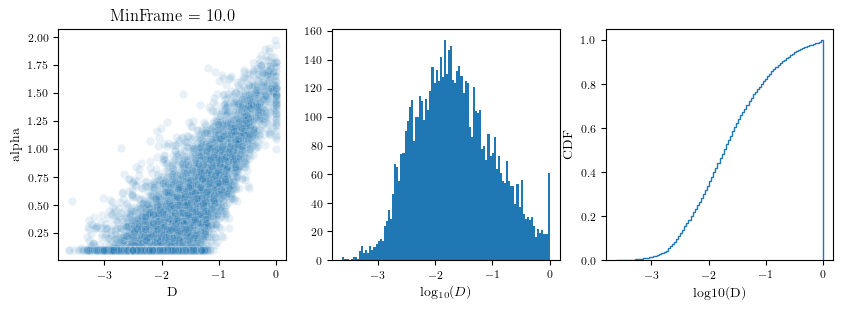

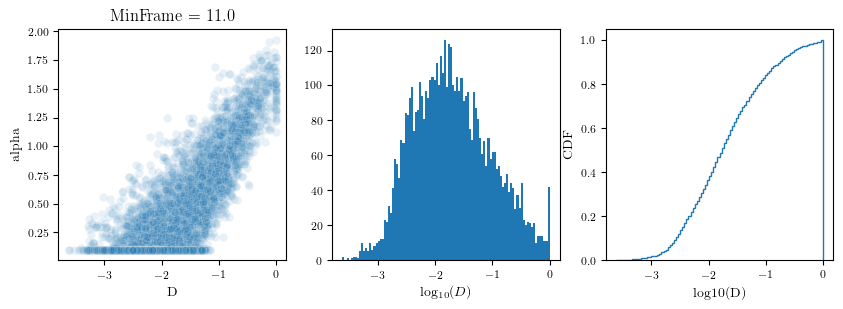

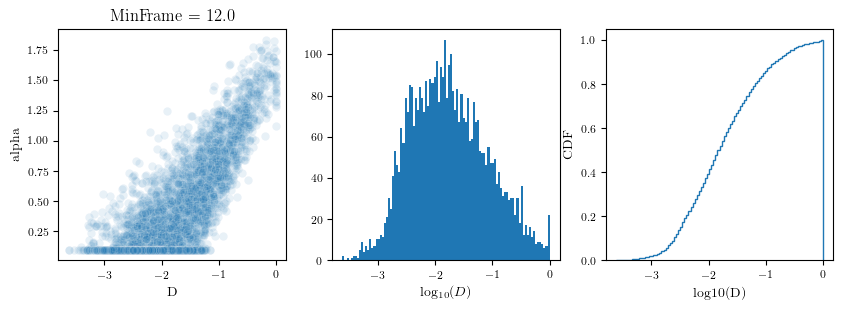

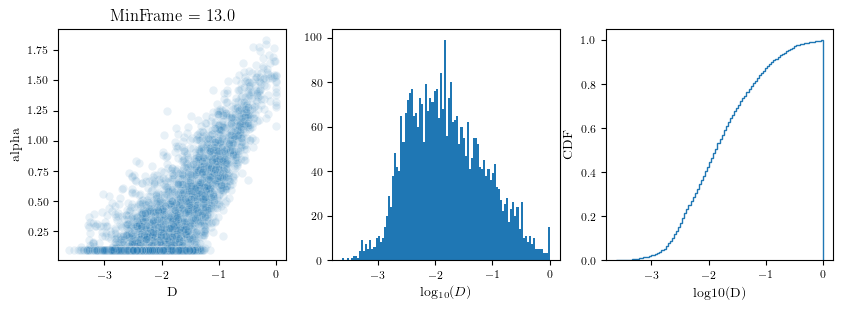

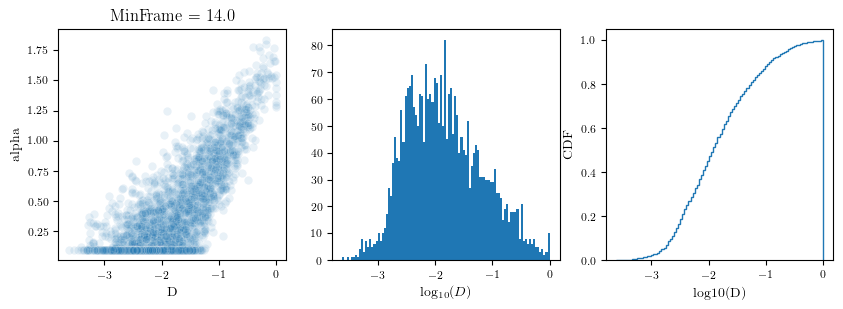

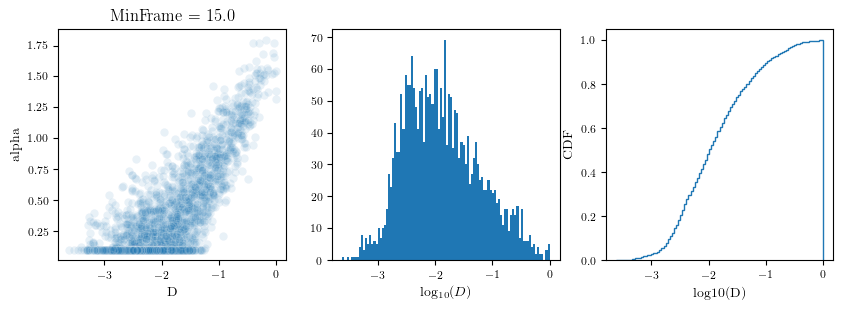

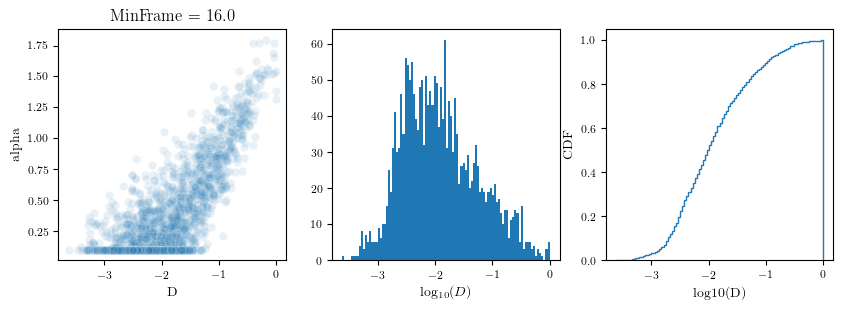

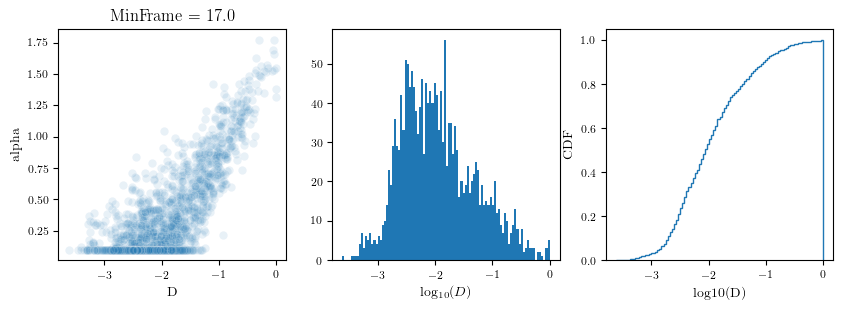

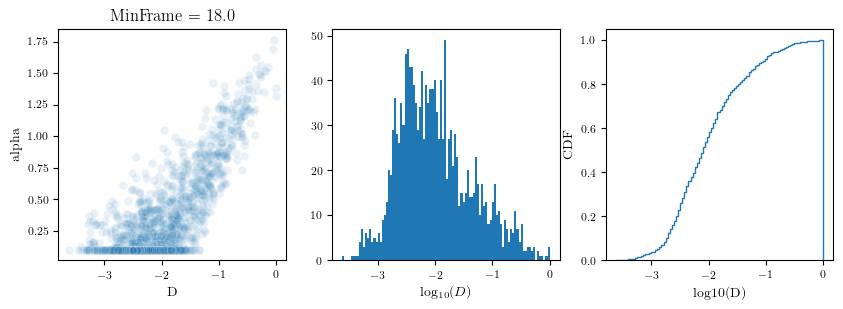

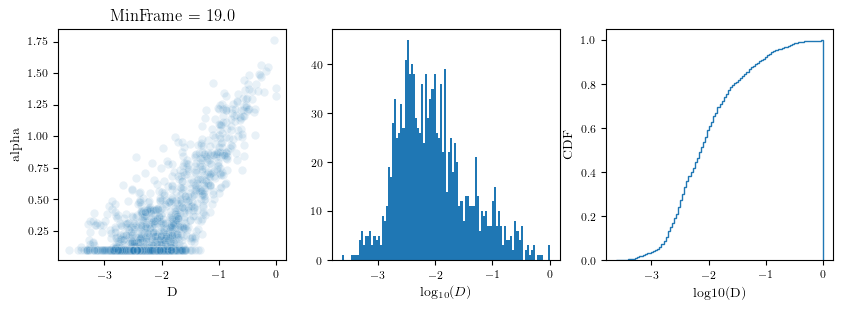

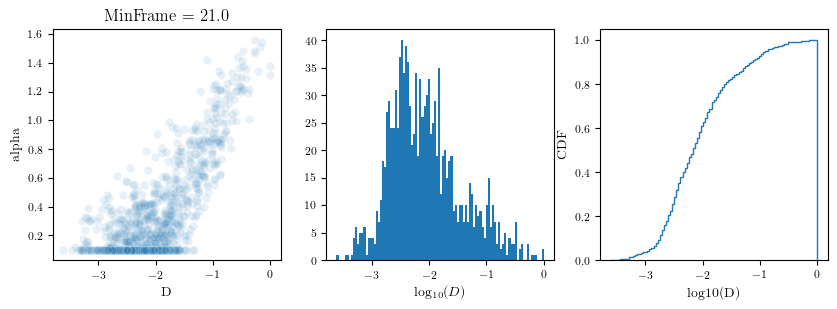

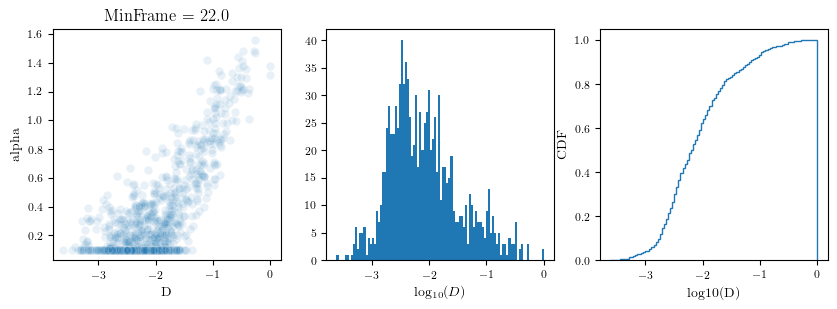

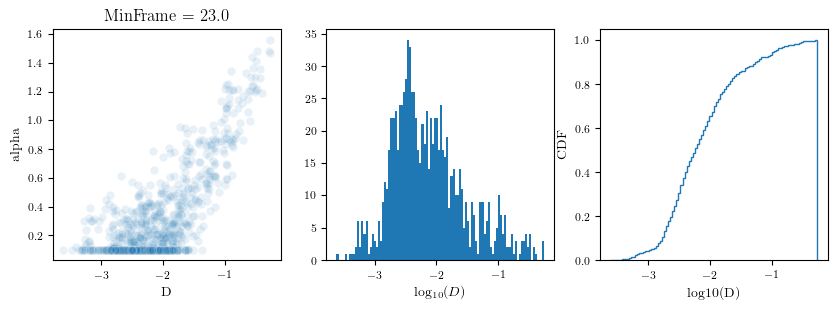

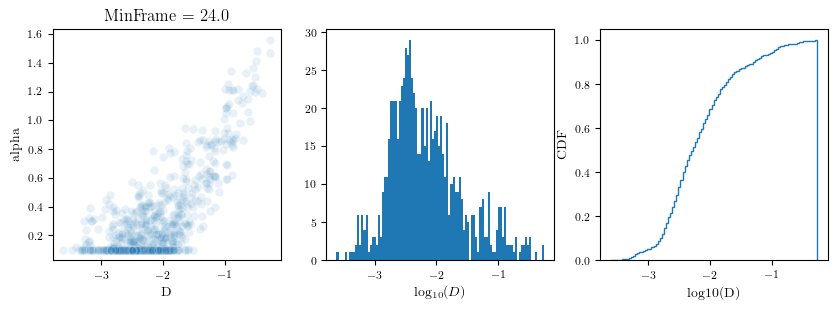

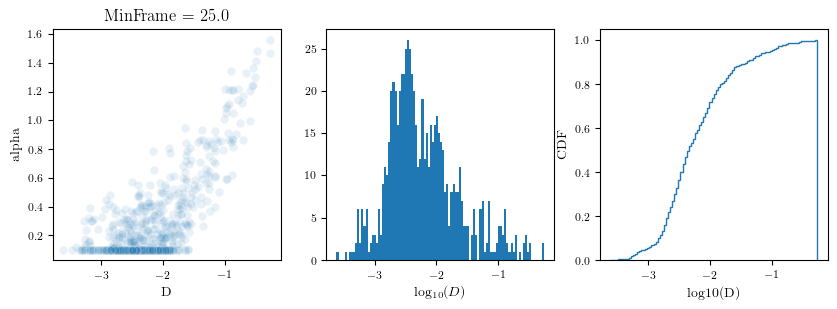

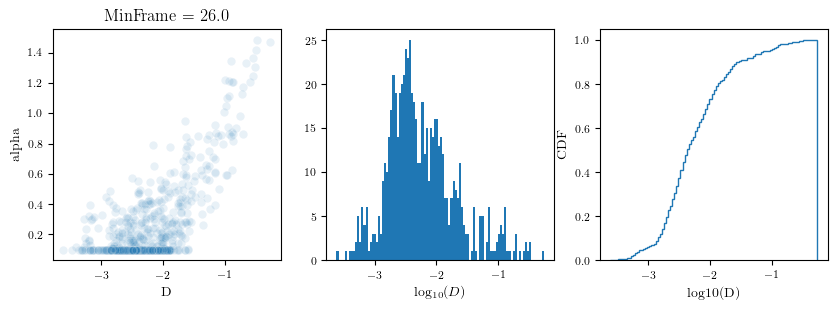

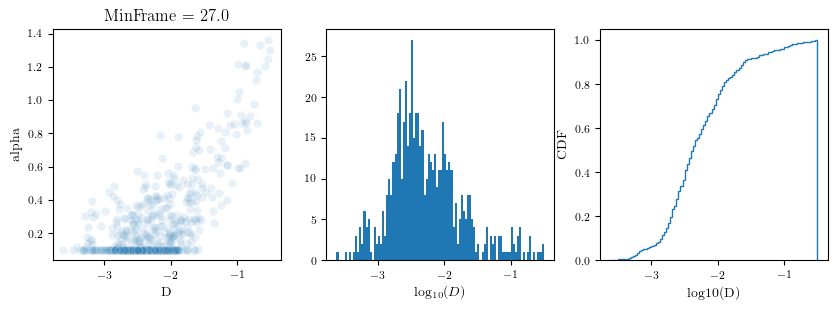

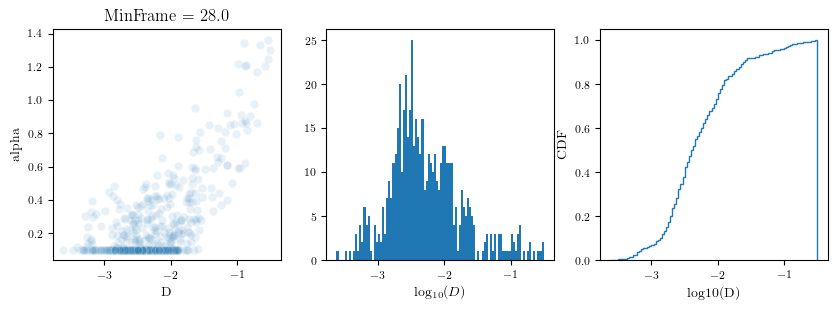

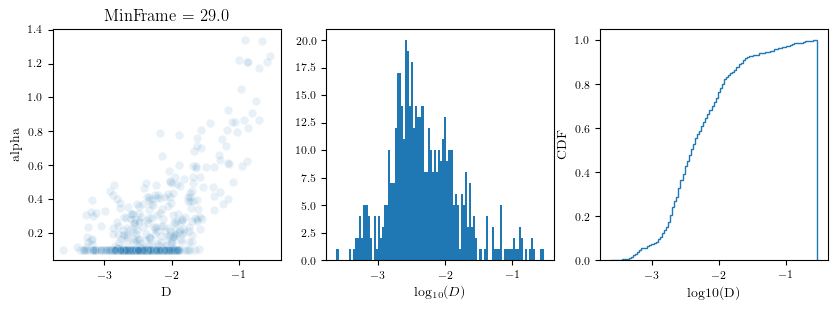

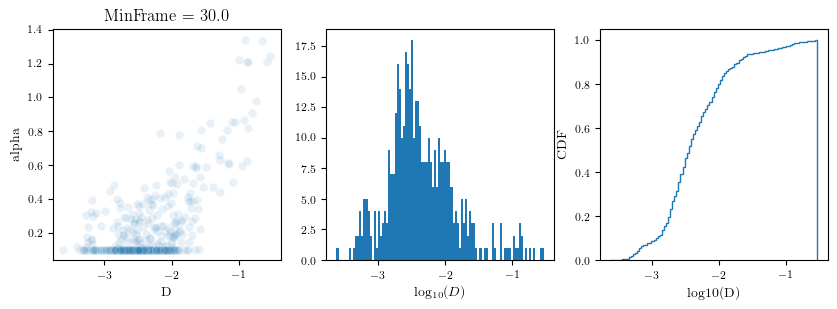

In [210]:
N = np.linspace(minframe,30,20)
for n in N:
    temp1 = data_stripped[(data_stripped['N']>n) & (data_stripped['R2']>-100)]
    fig, ax = plt.subplots(1,3,figsize=(10,3))
    
    sns.scatterplot(x='D',y='alpha',data=temp1,ax=ax[0],alpha=0.1)
    ax[0].set_title('MinFrame = '+str(round(n)))
    
    ax[1].hist(temp1['D'],bins=100)
    ax[1].set_xlabel(r'log$_{10}(D)$')
    
    ax[2].hist(temp1['D'],bins=100,density=True, histtype='step',cumulative=True)
    ax[2].set_ylabel('CDF')
    ax[2].set_xlabel('log10(D)')

    plt.show()

In [277]:
data_stripped = data_stripped[(data_stripped['N']>=17) & (data_stripped['R2']>0)]

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import *

temp = data_stripped[['c','alpha','D']].values
scaler = PowerTransformer()
scaler.fit(temp)
temp_scaled = scaler.transform(temp)

gmm = GaussianMixture(n_components=4,max_iter=500,covariance_type='full',tol=1.0E-10,reg_covar=1.0E-10,init_params='random',n_init=500)
gmm.fit(temp_scaled)
proba_lists = gmm.predict_proba(temp_scaled)

colored_arrays = np.matrix(proba_lists)
colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]
colorlist = [np.argmax(x) for x in colored_tuples]
data_stripped['GM_Label']=colorlist

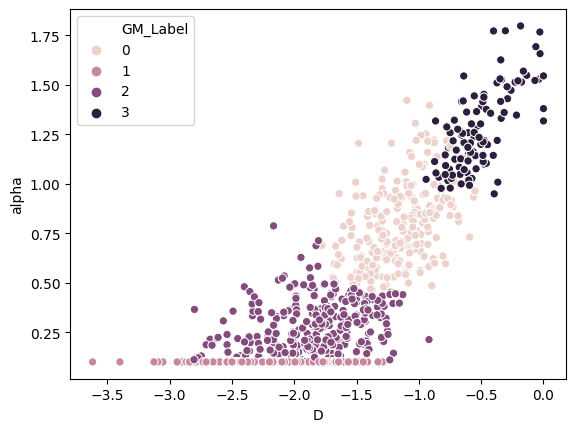

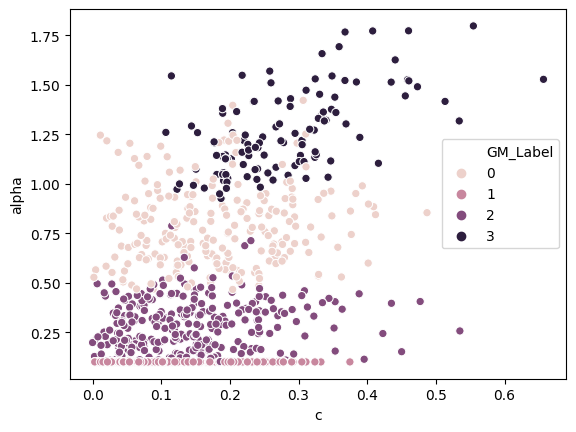

In [278]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.scatterplot(x='D',y='alpha',hue='GM_Label',data=data_stripped)
plt.show()

sns.scatterplot(x='c',y='alpha',hue='GM_Label',data=data_stripped)
plt.show()

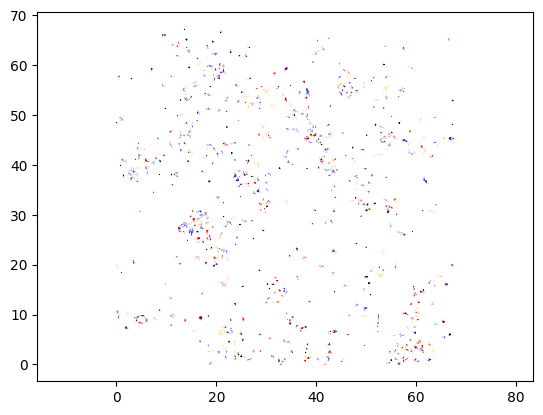

In [279]:
X1,Y1 = list(data_stripped['x'][(data_stripped['GM_Label']==1)].values),list(data_stripped['y'][(data_stripped['GM_Label']==1)].values)
for x,y in zip(X1,Y1):
    plt.plot(x,y,c='k',linewidth=0.1)
X2,Y2 = list(data_stripped['x'][(data_stripped['GM_Label']==2)].values),list(data_stripped['y'][(data_stripped['GM_Label']==2)].values)
for x,y in zip(X2,Y2):
    plt.plot(x,y,c='red',linewidth=0.1)
X3,Y3 = list(data_stripped['x'][(data_stripped['GM_Label']==0)].values),list(data_stripped['y'][(data_stripped['GM_Label']==0)].values)
for x,y in zip(X3,Y3):
    plt.plot(x,y,c='blue',linewidth=0.1)
    
X4,Y4 = list(data_stripped['x'][(data_stripped['GM_Label']==3)].values),list(data_stripped['y'][(data_stripped['GM_Label']==3)].values)
for x,y in zip(X4,Y4):
    plt.plot(x,y,c='orange',linewidth=0.1)
    
X5,Y5 = list(data_stripped['x'][(data_stripped['GM_Label']==4)].values),list(data_stripped['y'][(data_stripped['GM_Label']==4)].values)
for x,y in zip(X5,Y5):
    plt.plot(x,y,c='green',linewidth=0.1)
    
plt.axis('equal')
plt.savefig('test.pdf',dpi=1200)
plt.show()

In [280]:
#Try to determine automatically the index for the confined group CAREFUL NEED TO SET BY HAND THE LABEL FOR FAST POPULATION
index = [0,1,2,3]
D_per_group = []
for indx in index:
    Dmean = data_stripped['D'][(data_stripped['GM_Label']==indx)].mean()
    D_per_group.append(Dmean)

index_confined = D_per_group.index(min(D_per_group))
labels_GM = list(data_stripped['GM_Label'].values)
labels = ['fast_pop' if x==0 else 'transport' if x==3 else 'slow_pop' if x==2 else 'nan' for x in labels_GM]

data_stripped['Label']=labels

In [194]:
#display(data_stripped)

In [281]:
frames = [data_done, data_stripped[(data_stripped['Label'] != 'nan')]]
result = pd.concat(frames)
#display(result)

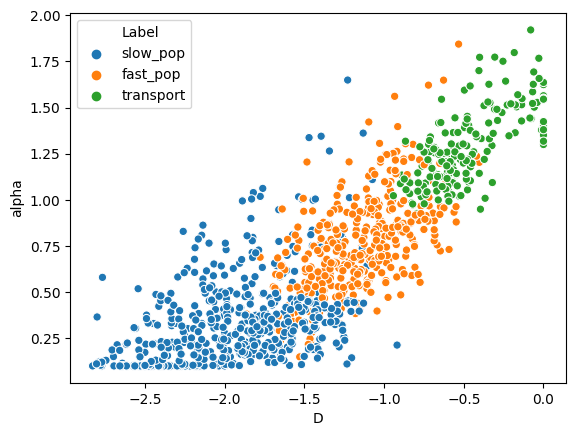

In [282]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.scatterplot(x='D',y='alpha',hue='Label',data=result)
plt.show()

Compute the TE-MSD and ensemble variance...


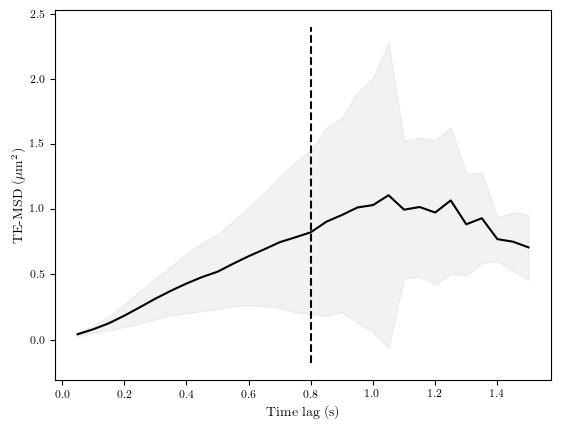

You have set a cutoff at  0.8  s...
Done. The TE-MSD and associated variance have been generated.


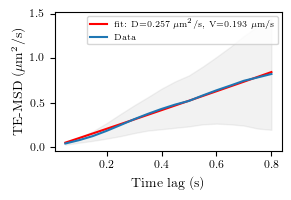

In [293]:
MSDtransport = list(result['MSD'][(result['Label']=='transport')].values)
temsd,var,timelag = TE_MSD(MSDtransport,cutoff=0.8)

from scipy.optimize import curve_fit

def drift_model(timelag, D, V):
    return(4*D*timelag+(V**2)*(timelag**2))

popt, pcov = curve_fit(drift_model, timelag, temsd)

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('tex')
width = 469.75502
fig= plt.figure(figsize=set_size(width, fraction=0.45))
grid = plt.GridSpec(1, 1, wspace=0.8, hspace=0.8)
ax = fig.add_subplot(grid[0,0])
ax.plot(timelag, drift_model(timelag, *popt), 'r-',label=r'fit: D=%5.3f $\mu$m$^2/$s, V=%5.3f $\mu$m/s' % tuple(popt))
ax.plot(timelag,temsd,label='Data')
ax.fill_between(timelag,[msd+np.sqrt(var) for msd,var in zip(temsd,var)], [msd-np.sqrt(var) for msd,var in zip(temsd,var)],color='gray',alpha=0.1)
#ax.set_xlim(0.05,30)
ax.set_xlabel('Time lag (s)')
ax.set_ylabel(r'TE-MSD ($\mu$m$^2/$s)')
plt.legend(fontsize=6)
#fig.savefig('Drift/Plots/drift_movie_ensemble_msd_fit.pdf', format='pdf', bbox_inches='tight')
plt.show()
#Michalet(MSDfast,cutoff=1) #CAREFUL THIS IS SLOW DUE TO THE VERY LONG TRACKS


Compute the TE-MSD and ensemble variance...


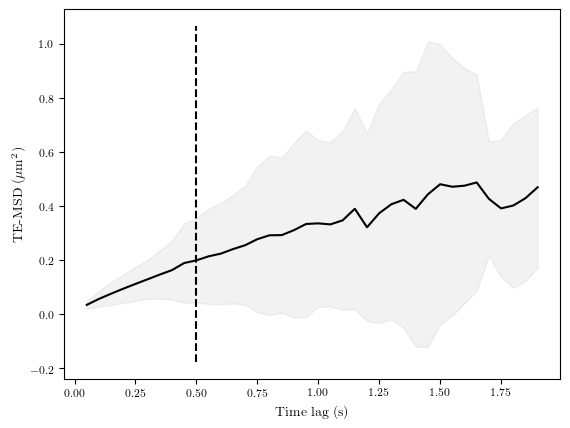

You have set a cutoff at  0.5  s...
Done. The TE-MSD and associated variance have been generated.
#############################################
############## PROGRAM MICHALET #############
#############################################
Compute the TE-MSD and ensemble variance...
Number of T-MSDs at time lag  0.05  =  369
Number of T-MSDs at time lag  0.1  =  369
Number of T-MSDs at time lag  0.15  =  369
Number of T-MSDs at time lag  0.2  =  369
Number of T-MSDs at time lag  0.25  =  369
Number of T-MSDs at time lag  0.3  =  369
Number of T-MSDs at time lag  0.35  =  369
Number of T-MSDs at time lag  0.4  =  369
Number of T-MSDs at time lag  0.45  =  369
Number of T-MSDs at time lag  0.5  =  340
Number of T-MSDs at time lag  0.55  =  311
Number of T-MSDs at time lag  0.6  =  291
Number of T-MSDs at time lag  0.65  =  279
Number of T-MSDs at time lag  0.7  =  265
Number of T-MSDs at time lag  0.75  =  258
Number of T-MSDs at time lag  0.8  =  251
Number of T-MSDs at time lag  0.85  =  2

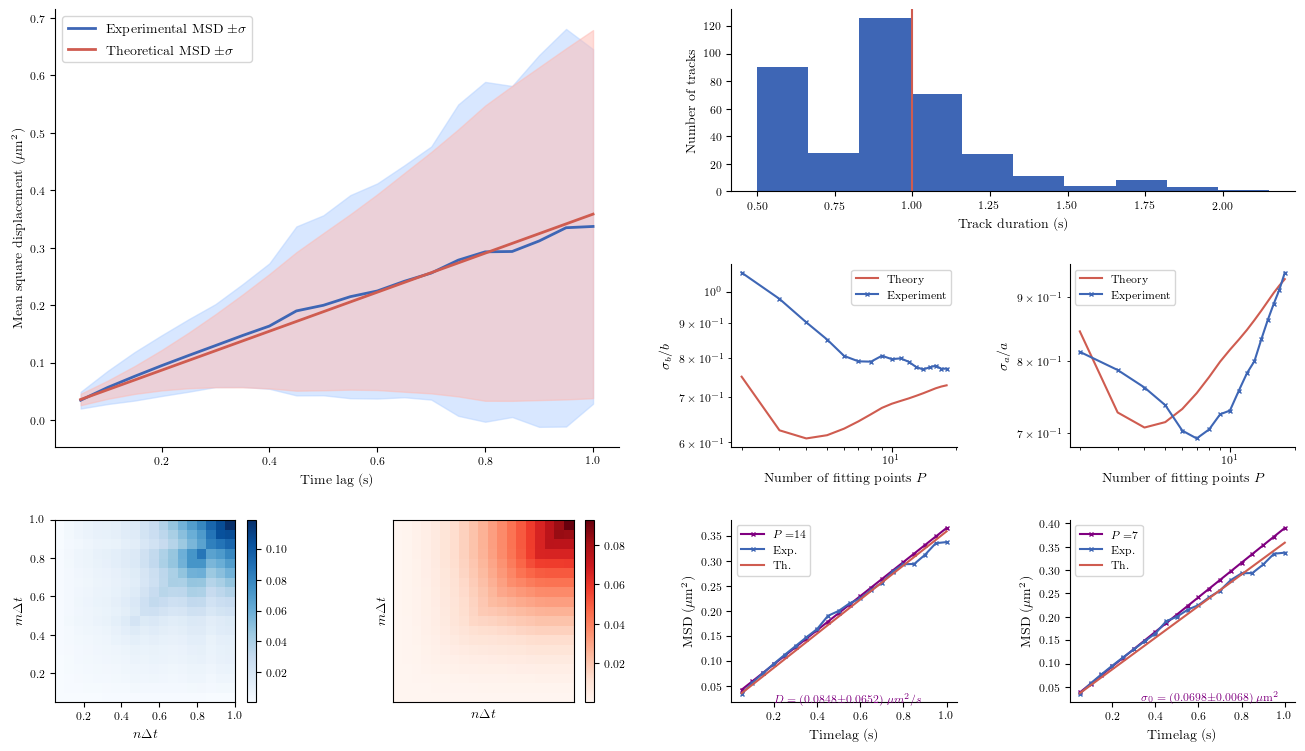

/home/remy13127/Documents/Internship/Functions/functions.py:1013: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


(0.0848, 0.0652, 0.0698, 0.0068)

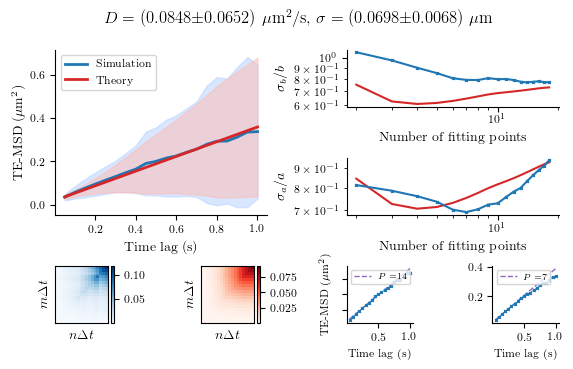

In [290]:
MSDfast = list(result['MSD'][(result['Label']=='fast_pop')].values)
temsd,var,timelag = TE_MSD(MSDfast,cutoff=0.5)
Michalet(MSDfast,cutoff=1)

Compute the TE-MSD and ensemble variance...


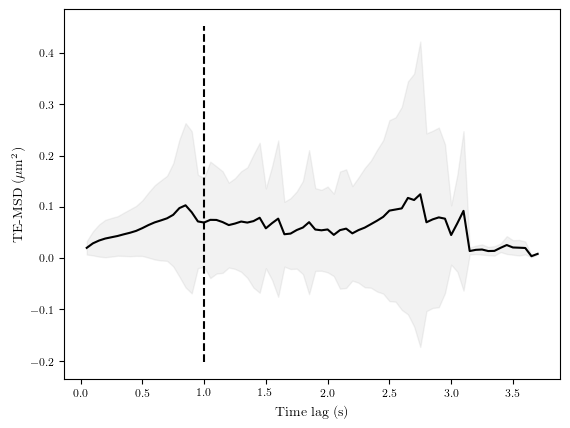

You have set a cutoff at  1  s...
Done. The TE-MSD and associated variance have been generated.
#############################################
############## PROGRAM MICHALET #############
#############################################
Compute the TE-MSD and ensemble variance...
Number of T-MSDs at time lag  0.05  =  499
Number of T-MSDs at time lag  0.1  =  499
Number of T-MSDs at time lag  0.15  =  499
Number of T-MSDs at time lag  0.2  =  499
Number of T-MSDs at time lag  0.25  =  499
Number of T-MSDs at time lag  0.3  =  499
Number of T-MSDs at time lag  0.35  =  499
Number of T-MSDs at time lag  0.4  =  499
Number of T-MSDs at time lag  0.45  =  499
Number of T-MSDs at time lag  0.5  =  485
Number of T-MSDs at time lag  0.55  =  468
Number of T-MSDs at time lag  0.6  =  456
Number of T-MSDs at time lag  0.65  =  448
Number of T-MSDs at time lag  0.7  =  435
Number of T-MSDs at time lag  0.75  =  426
Number of T-MSDs at time lag  0.8  =  416
Number of T-MSDs at time lag  0.85  =  360

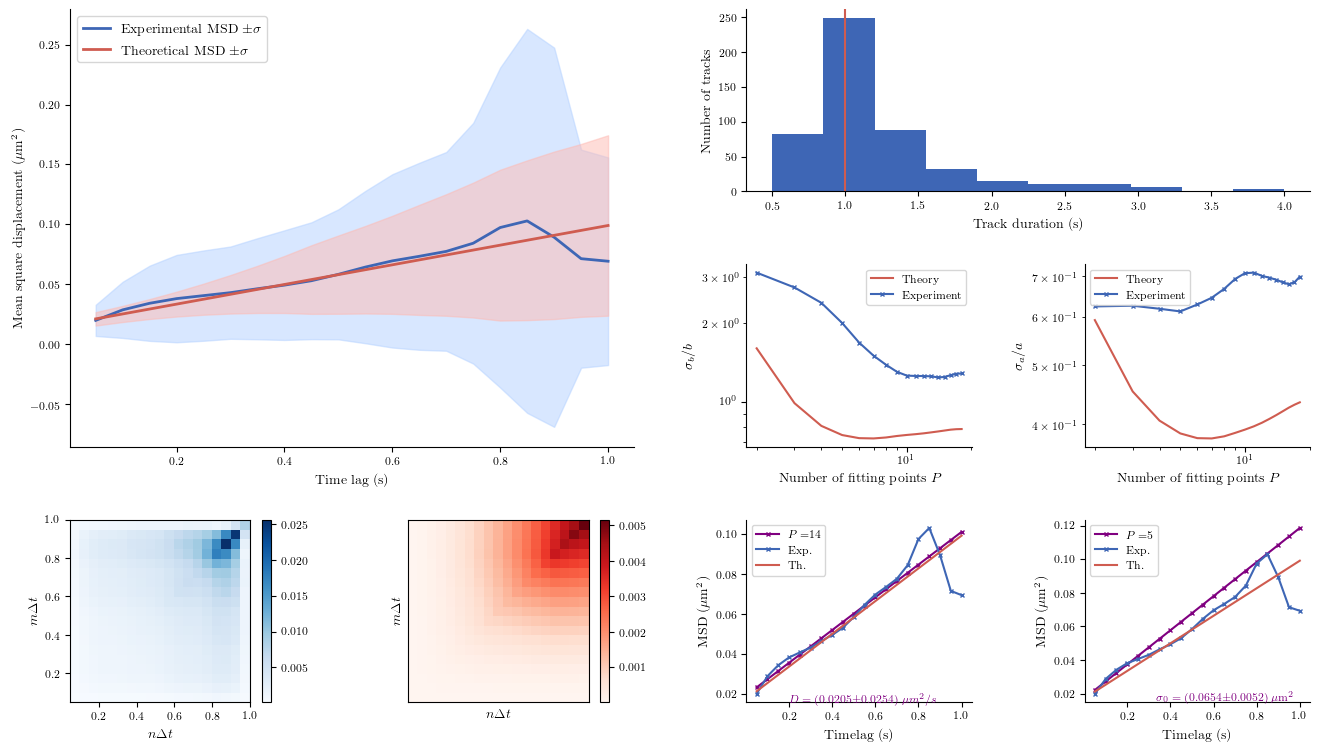

/home/remy13127/Documents/Internship/Functions/functions.py:1013: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


(0.0205, 0.0254, 0.0654, 0.0052)

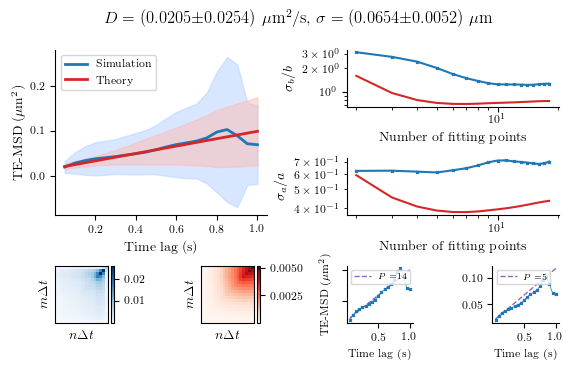

In [291]:
MSDfast = list(result['MSD'][(result['Label']=='slow_pop')].values)
temsd,var,timelag = TE_MSD(MSDfast,cutoff=1)
Michalet(MSDfast,cutoff=1)